# Titanic: Machine Learning from Disaster

## Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

## Objective

Predict what sorts of people were likely to survive.

Inspiration:
   - https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic
   - https://www.kaggle.com/poonaml/titanic/titanic-survival-prediction-end-to-end-ml-pipeline
   - https://www.kaggle.com/helgejo/titanic/an-interactive-data-science-tutorial
   - https://www.kaggle.com/arthurlu/titanic/exploratory-tutorial-titanic

## Table of contents

- [First look at the data](#First-look-at-the-data)
    - [Import Libraries](#Import-Libraries)
    - [Load Data](#Load-Data)
    - [Brief summaries](#Brief-summaries)
- [Visualization](#Visualization)
    - [Getting a better basic understanding of the data](#Getting-a-better-basic-understanding-of-the-data)
    - [Studying features relationship whith the Target feature : Survived](#Studying-features-relationship-whith-the-Target-feature-:-Survived)
- [Missing Values](#Missing-Values)
    - [Embarked](#Embarked)
    - [Fare](#Fare)
    - [Age with Median](#Age-with-median)
- [Features engineering](#Features-engineering)
    - [Name](#Name)
    - [Family](#Family)
    - [Name](#Name)
    - [Convert Categorical variables into Numerical ones](#Convert-Categorical-variables-into-Numerical-ones)
    - [Feature Scalling](#Feature-Scalling)
- [Feature Selection](#Feature-selection)



- [Fill Age with ML](#Fill-Age-with-ML)

Importing a DataFrame
Visualize the Data
Cleanup and Transform the Data
Encode the Data
Split Training and Test Sets
Fine Tune Algorithms
Cross Validate with KFold
Upload to Kaggle

## First look at the data

### Import Libraries

In [1132]:
# Dataframe
import pandas as pd

# Visualization
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning
import sklearn as sk

### Load data

In [1133]:
# Load data directly into a dataframe
df_train=pd.read_csv("Data/Titanic/train.csv")
df_test=pd.read_csv("Data/Titanic/test.csv")

# Get a look at the first rows
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Variable Description
    - Survived: Survived (1) or died (0)
    - Pclass: Passenger's class
    - Name: Passenger's name
    - Sex: Passenger's sex
    - Age: Passenger's age
    - SibSp: Number of siblings/spouses aboard
    - Parch: Number of parents/children aboard
    - Ticket: Ticket number
    - Fare: Fare
    - Cabin: Cabin
    - Embarked: Port of embarkation
    
    Source of information : https://www.kaggle.com/c/titanic/data

### Brief summaries

In [1134]:
print("----------------------------------Informations for the training set----------------------------------\n")
df_train.info()
print('\n',df_train.isnull().sum())
print("\n----------------------------------Informations for the testing set ----------------------------------\n")
df_test.info()
print('\n',df_test.isnull().sum())

----------------------------------Informations for the training set----------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

----------------------------------Informations for the testing set -

Note that:
    - No Survived feature on the testing set
    - Cabin feature is mostly null --> Will be dropped
    - Embarked feature has a few missing values
    - Some Ages are missing --> Will need to be completed or drop the missing rows
    - Survived and Pclass should be treated as object because they are qualitative

In [1135]:
# Dropping Cabin, Ticket and PassengerId
df_train=df_train.drop(['Cabin','PassengerId','Ticket'], axis=1)

df_test=df_test.drop(['Cabin','Ticket'], axis=1)

In [1136]:
# Changing the type of Pclass and Survived 
df_train['Pclass']=df_train['Pclass'].astype(object)
df_train['Survived']=df_train['Survived'].astype(object)

df_test['Pclass']=df_test['Pclass'].astype(object)

In [968]:
# Basic statistical information about quantitative and qualitative columns

print("----------------------------------Informations for the training set----------------------------------\n")
# Quantitative
display(df_train.describe())
# Qualitative
display(df_train.describe(include=['object']))
print("----------------------------------Informations for the testing set----------------------------------\n")
# Quantitative
display(df_test.describe())
# Qualitative
display(df_test.describe(include=['object']))

----------------------------------Informations for the training set----------------------------------



Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200

Survived  Pclass                       Name   Sex Embarked
count        891     891                        891   891      889
unique         2       3                        891     2        3
top            0       3  Harper, Mr. Henry Sleeper  male        S
freq         549     491                          1   577      644

----------------------------------Informations for the testing set----------------------------------



PassengerId         Age       SibSp       Parch        Fare
count   418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000   30.272590    0.447368    0.392344   35.627188
std     120.810458   14.181209    0.896760    0.981429   55.907576
min     892.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000   39.000000    1.000000    0.000000   31.500000
max    1309.000000   76.000000    8.000000    9.000000  512.329200

Pclass                     Name   Sex Embarked
count      418                      418   418      418
unique       3                      418     2        3
top          3  Brady, Mr. John Bertram  male        S
freq       218                        1   266      270

###  Visualization

#### Getting a better basic understanding of the data

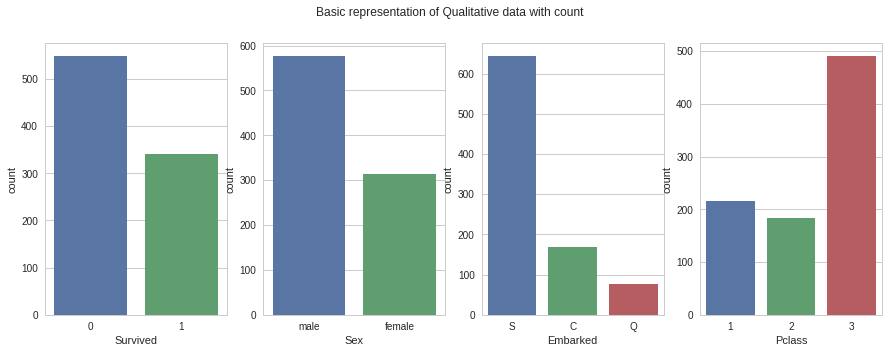

In [670]:
# Qualitative Data : [Survived, Sex, Embarked, Pclass] 
fig, (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(15,5))
sns.countplot(x='Survived', data=df_train, ax=axis1)
sns.countplot(x='Sex', data=df_train, ax=axis2)
sns.countplot(x='Embarked', data=df_train, ax=axis3)
sns.countplot(x='Pclass', data=df_train, ax=axis4)
fig.suptitle("Basic representation of Qualitative data with count")

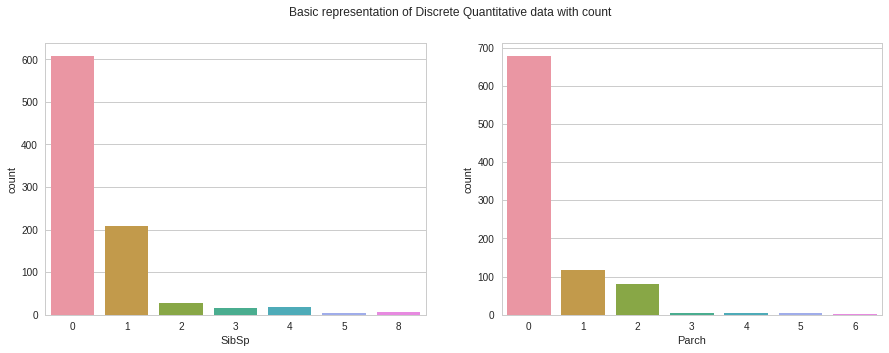

In [671]:
# Discrete Quantitative Data : [SibSp, Parch] 
fig2, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(df_train['SibSp'],ax=axis1)
sns.countplot(df_train['Parch'],ax=axis2)
fig2.suptitle("Basic representation of Discrete Quantitative data with count")

/home/jules/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


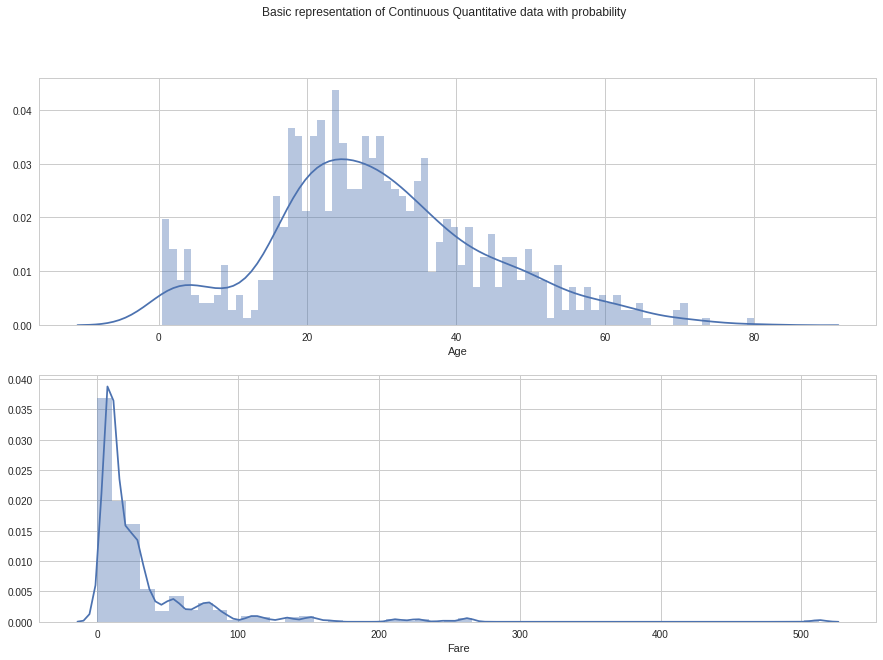

In [672]:
# Continuous Quantitative Data : [Age, Fare]
fig3, (axis1,axis2) = plt.subplots(2,1,figsize=(15,10))
sns.distplot(df_train['Age'].dropna(), bins=80, ax=axis1)
sns.distplot(df_train['Fare'], ax=axis2)
fig3.suptitle("Basic representation of Continuous Quantitative data with probability")

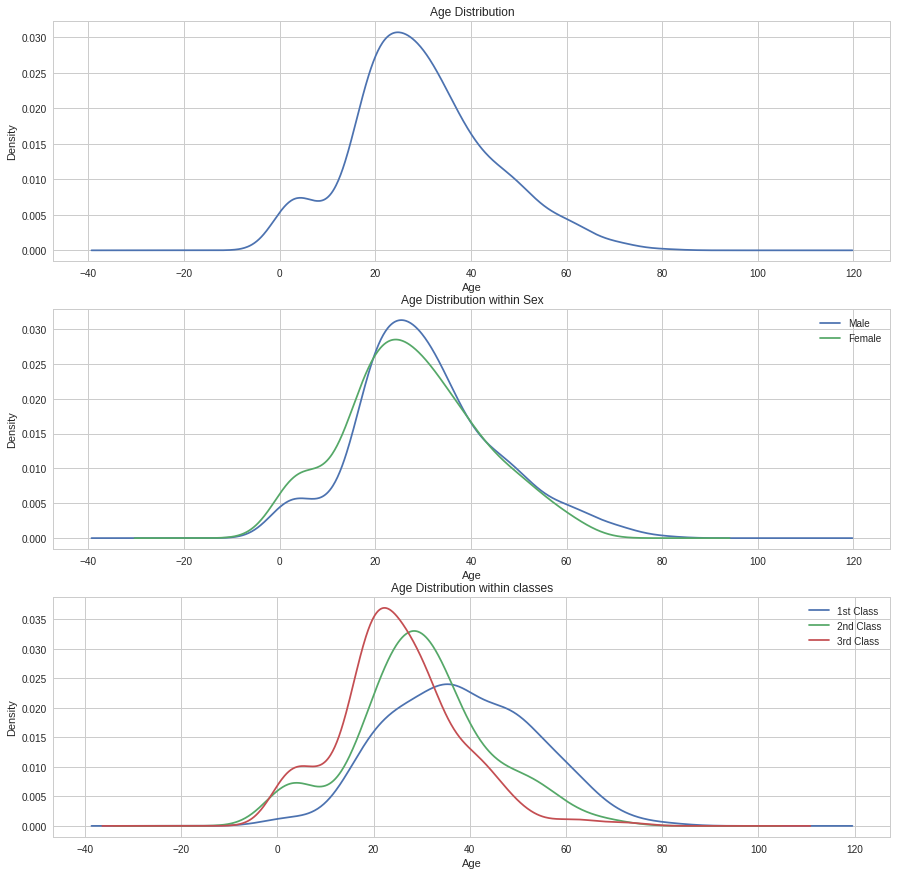

In [790]:
# Age distribution within Sex and Pclass
fig3, ((axis1),(axis2),(axis3)) = plt.subplots(3,1,figsize=(15,15))

# Age distribution
df_train.Age.plot(kind='kde',ax=axis1)
axis1.set_xlabel("Age")    
axis1.set_title("Age Distribution")

# Age distribution within Sex
df_train.Age[df_train.Sex == 'male'].plot(kind='kde',ax=axis2,)    
df_train.Age[df_train.Sex == 'female'].plot(kind='kde',ax=axis2)
axis2.set_xlabel("Age")    
axis2.set_title("Age Distribution within Sex")
axis2.legend(('Male', 'Female'))

# Age distribution within Pclass
df_train.Age[df_train.Pclass == 1].plot(kind='kde',ax=axis3)    
df_train.Age[df_train.Pclass == 2].plot(kind='kde',ax=axis3)
df_train.Age[df_train.Pclass == 3].plot(kind='kde',ax=axis3)
axis3.set_xlabel("Age")    
axis3.set_title("Age Distribution within Classes")
axis3.legend(('1st Class', '2nd Class','3rd Class'))

#### Studying features relationship whith the Target feature : Survived

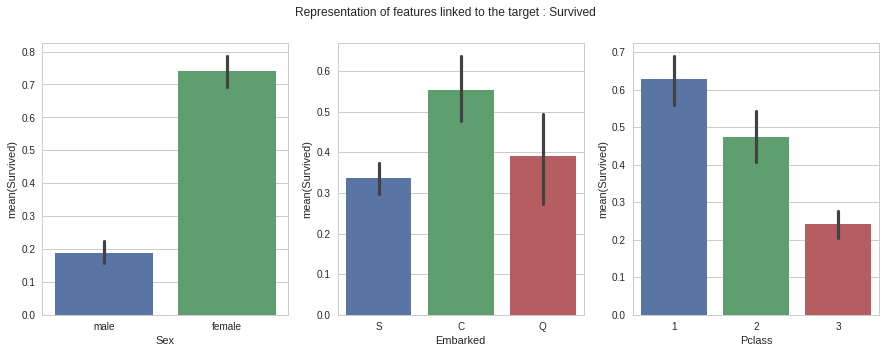

In [675]:
# [Sex, Pclass, Embarked] by mean of survival
fig4, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='Sex',y='Survived', data=df_train, ax=axis1)
sns.barplot(x='Embarked',y='Survived', data=df_train, ax=axis2)
sns.barplot(x='Pclass',y='Survived', data=df_train, ax=axis3)
fig4.suptitle("Representation of features linked to the target : Survived ")

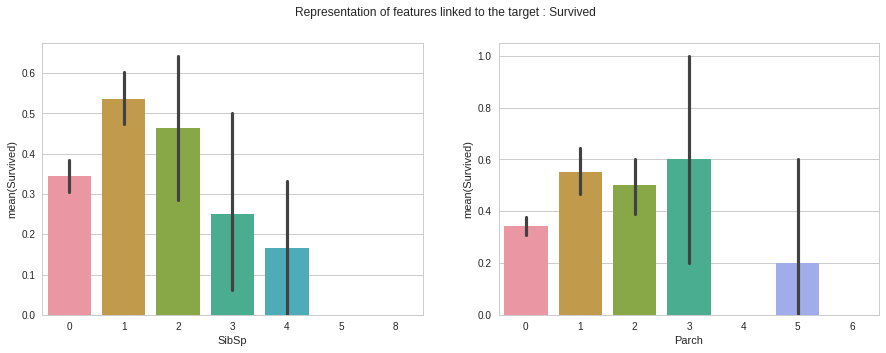

In [676]:
# [SibSp, Parch] by mean of survival
fig6, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='SibSp',y='Survived', data=df_train, ax=axis1)
sns.barplot(x='Parch',y='Survived', data=df_train, ax=axis2)
fig6.suptitle("Representation of features linked to the target : Survived ")

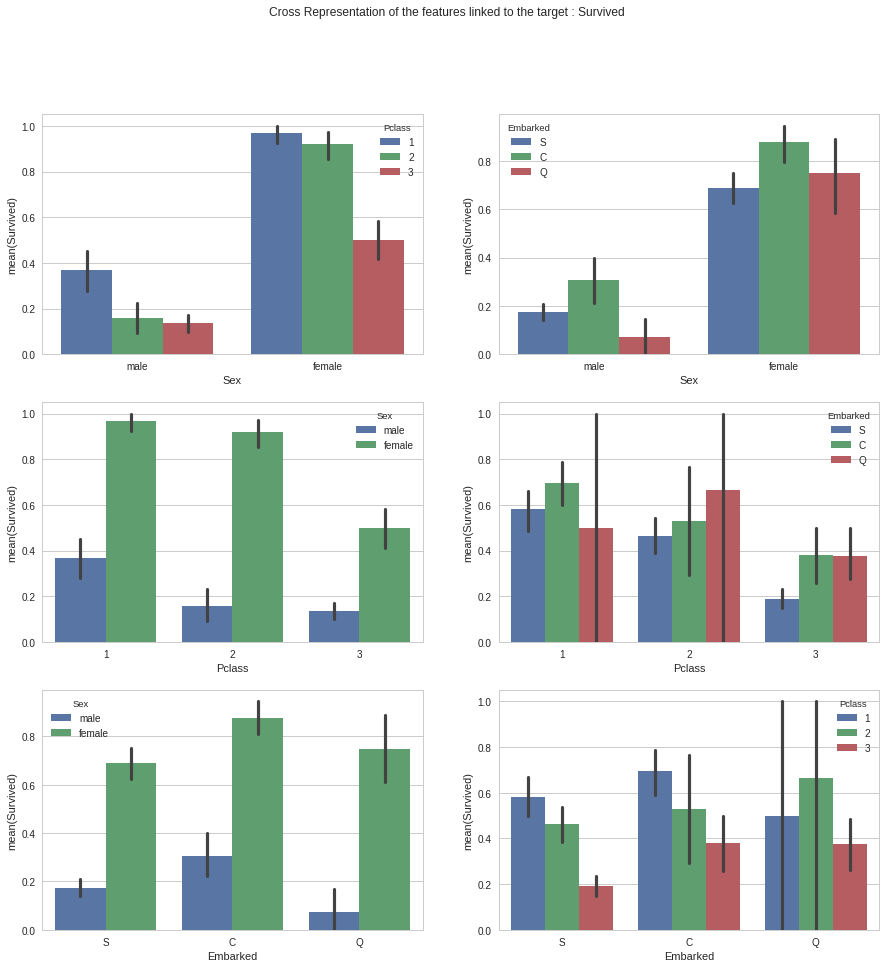

In [681]:
# Cross relation betwen [Sex, Pclass, Embarked] by mean of survival
fig5, ((axis1,axis2),(axis3,axis4),(axis5,axis6)) = plt.subplots(3,2,figsize=(15,15))
sns.barplot(x='Sex',y='Survived',hue='Pclass', data=df_train, ax=axis1)
sns.barplot(x='Sex',y='Survived',hue='Embarked', data=df_train, ax=axis2)

sns.barplot(x='Pclass',y='Survived',hue='Sex', data=df_train, ax=axis3)
sns.barplot(x='Pclass',y='Survived',hue='Embarked', data=df_train, ax=axis4)

sns.barplot(x='Embarked',y='Survived',hue='Sex', data=df_train, ax=axis5)
sns.barplot(x='Embarked',y='Survived',hue='Pclass', data=df_train, ax=axis6)

fig5.suptitle("Cross Representation of the features linked to the target : Survived")

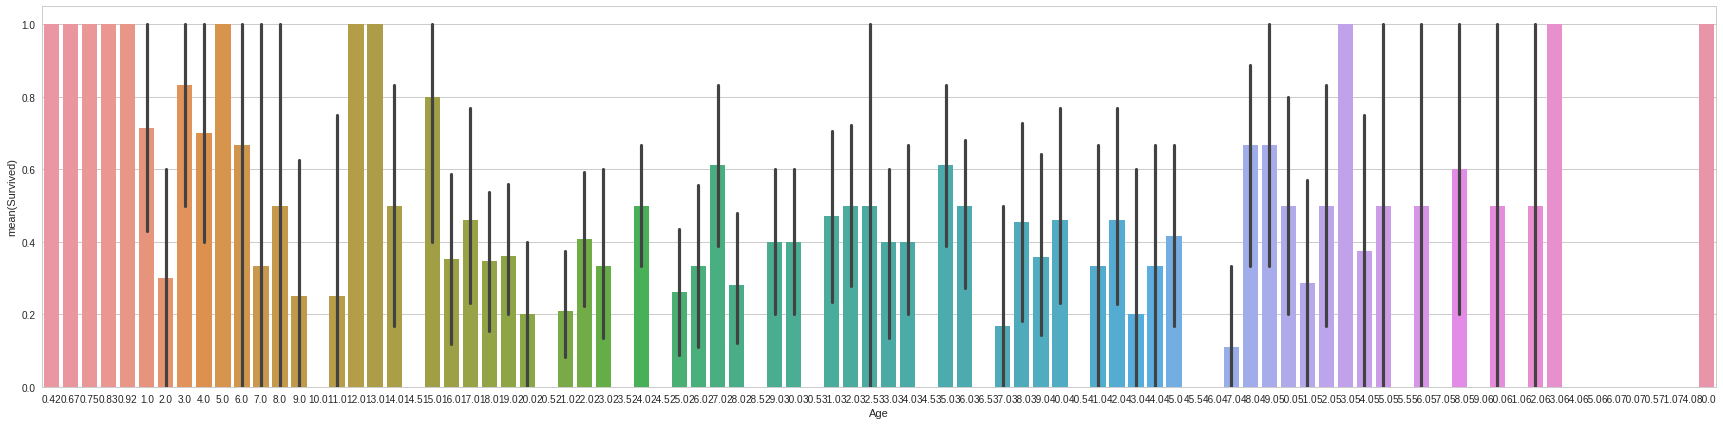

In [793]:
# Age by mean of survival
fig=sns.barplot(x='Age', y='Survived', data=df_train)

/home/jules/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


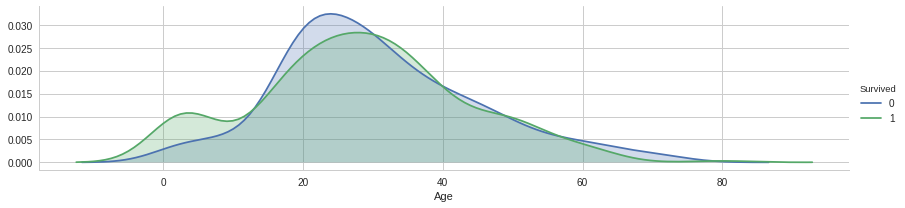

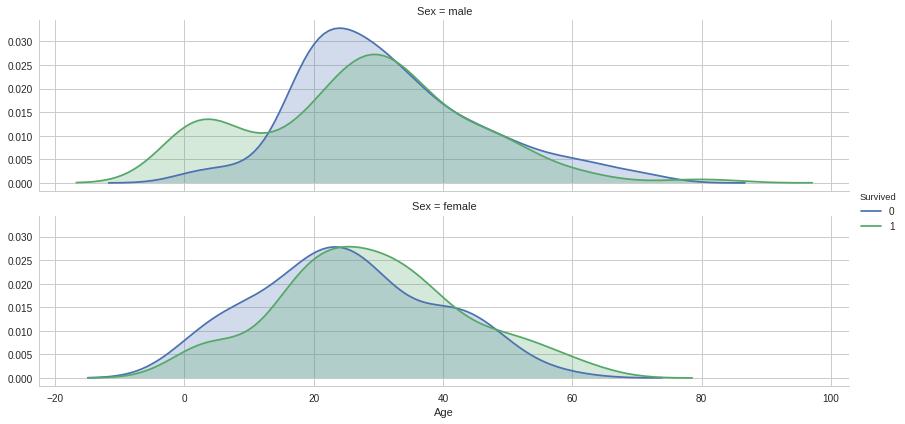

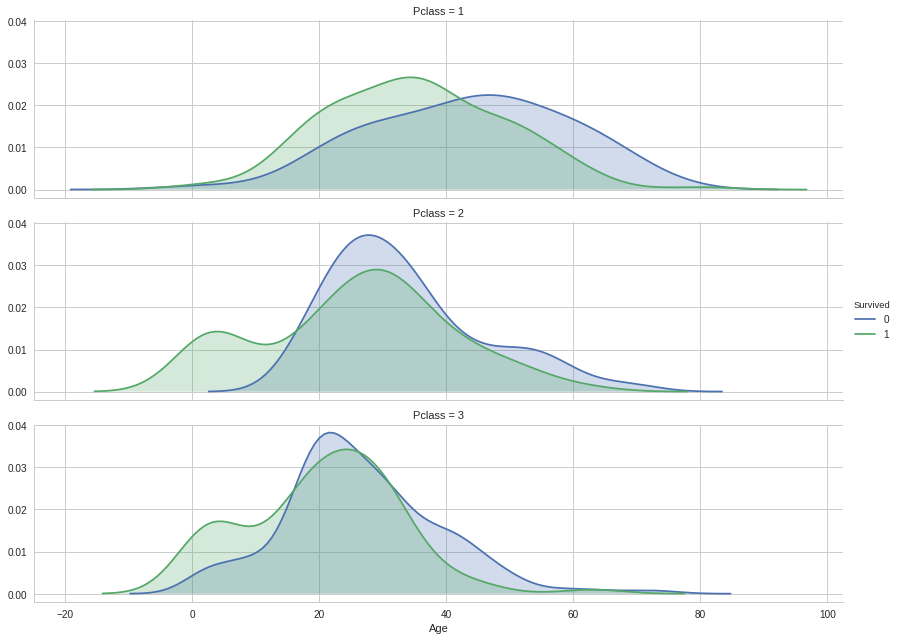

In [804]:
# Age

# Kernel density of survivor and non survivor by Age
g1 = sns.FacetGrid( df_train , hue='Survived' , aspect=4)
g1.map( sns.kdeplot , 'Age' , shade= True )
g1.add_legend()

# Kernel density of survivor and non survivor by Age and Sex 
g2 = sns.FacetGrid( df_train , hue='Survived' , aspect=4 , row = 'Sex')
g2.map( sns.kdeplot , 'Age' , shade= True )
g2.add_legend()

# Kernel density of survivor and non survivor by Age and Pclass
g3 = sns.FacetGrid( df_train , hue='Survived' , aspect=4 , row = 'Pclass')
g3.map( sns.kdeplot , 'Age' , shade= True )
g3.add_legend()

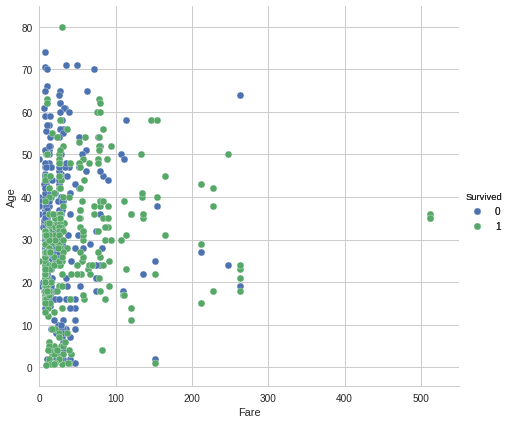

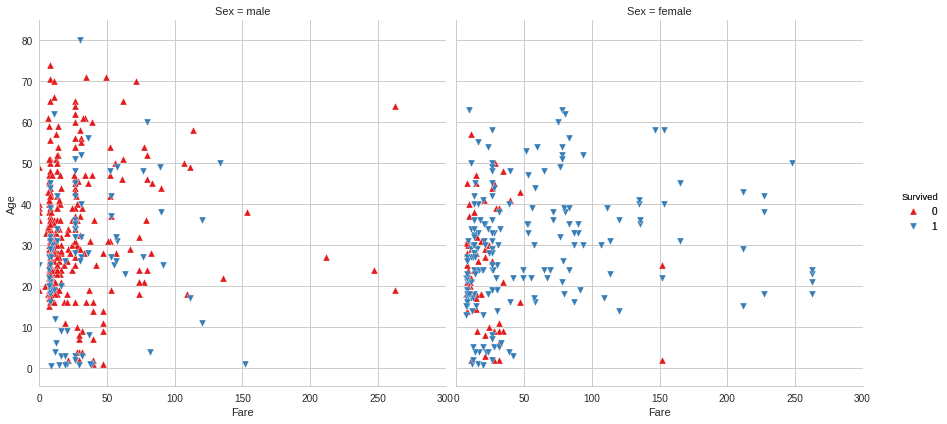

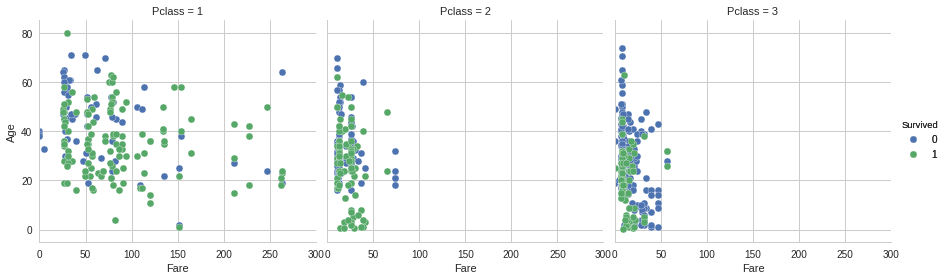

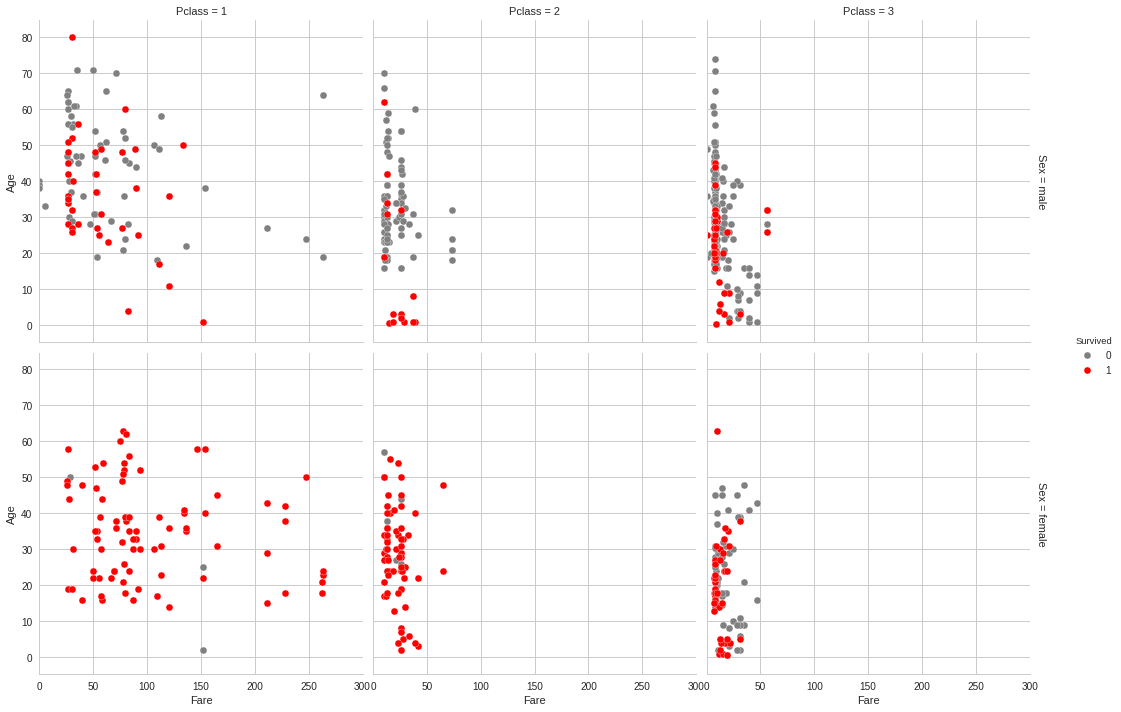

In [832]:
# Fare

# Scatterplot Fare & Age
g = sns.FacetGrid(df_train, hue="Survived", size=6)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.add_legend()
g.set(xlim=(0, 550))

# Scatterplot Fare & Age by Sex
g = sns.FacetGrid(df_train, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]),size=6)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.add_legend()
g.set(xlim=(0, 300))

# Scatterplot Fare & Age by Pclass
g = sns.FacetGrid(df_train, col="Pclass", hue="Survived", size=4)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.add_legend()
g.set(xlim=(0, 300))

# Scatterplot Fare & Age by Pclass & Sex
g = sns.FacetGrid(df_train, hue="Survived", col="Pclass", row="Sex" ,margin_titles=True,
                  palette={1:"red", 0:"grey"},size=5)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.set(xlim=(0, 300))


In [689]:
# Correlation with survived
# df_train.corr() # marche pas car survived est object

In [690]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Number_of_relatives', 'Size_Family'],
      dtype='object')

### Features engineering

#### Combined DataFrame

In [1137]:
# Creation of a dataframe with train and test for Feature Engineering
def get_combined_data():
    # reading train data
    train = pd.read_csv("Data/Titanic/train.csv")
    
    # reading test data
    test = pd.read_csv("Data/Titanic/test.csv")

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    #train.drop('Survived',axis=1,inplace=True)

    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',axis=1,inplace=True)
    
    return combined

def recover_train_test_target(combined):
    
    train0 = pd.read_csv("Data/Titanic/train.csv")
    
    targets = train0.Survived
    train = combined.ix[0:890]
    test = combined.ix[891:]
    
    return train,test,targets

In [1138]:
combined = get_combined_data()

#### Name

In [1139]:
# Name

#Create feature for the length of name 
combined["Name_Length"] = combined["Name"].apply(lambda x: len(x))

# Create a categorical feature Name_Size
combined['Name_Size']=pd.cut(combined['Name_Length']
                            ,bins=[0,20,40,60,90]
                            ,labels=["Short","Medium","Long","Very Long"])

# Extract the title from each name
combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

# Map for aggregated titles
Title_Dictionary = {
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Master" :    "Master",
                    "Lady" :      "Royalty",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dona":       "Royalty",
                    "the Countess":"Royalty"
                    }
    
# Mapping
combined['Title_aggr'] = combined.Title.map(Title_Dictionary)

#### Family

In [1140]:
# Family

# Creation of a feature Number_of_relatives = SibSp + Parch
combined['Number_of_relatives']=combined['SibSp']+combined['Parch']

# Creation of a categorical feature Size_Family
combined.loc[combined['Number_of_relatives'] == 0, 'Size_Family'] = 'Alone'
combined.loc[ (combined['Number_of_relatives'] > 0) 
            & (combined['Number_of_relatives'] < 4), 'Size_Family'] = 'Small'
combined.loc[combined['Number_of_relatives'] > 3, 'Size_Family'] = 'Big'

We can create 3 categories : 
    - Alone = 0
    - Small = [1,2,3]
    - Big = > 3

### Missing Values

#### Embarked

Fare  Pclass Embarked
61   80.0       1      NaN
829  80.0       1      NaN

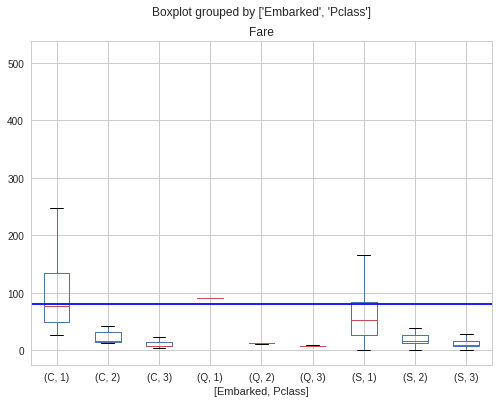

In [1141]:
# Embarked

# Get the null rows where Embarked is null
display(combined[combined.Embarked.isnull()][['Fare', 'Pclass', 'Embarked']])

# Embarked missing values
combined.boxplot(column='Fare', by=['Embarked','Pclass'], figsize=(8,6))
plt.axhline(y=80, color='blue')

# Remplace null values by C because most people who are Pclass 1 and Fare 80 has Embarked from C
combined = combined.set_value(combined.Embarked.isnull(), 'Embarked', 'C')

#### Fare

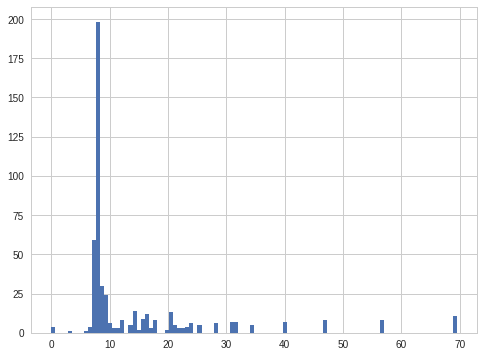

In [1142]:
# Fare

# Visualization of the fare which is missing
combined[combined.Fare.isnull()][['Pclass', 'Fare', 'Embarked']]
#df_test[(df_test.Pclass==3)&(df_test.Embarked=='S')].Fare.hist(bins=100)
combined.loc[(combined['Pclass']==3) & (combined['Embarked']=='S')].Fare.hist(bins=100,figsize=(8,6))

# Get and affect the median to the missing value
Fare_median=combined[(combined.Pclass==3) & (combined.Embarked=='S')].Fare.median()
#df_test = df_test.set_value(df_test.Fare.isnull(), 'Fare', Fare_median)
combined["Fare"].fillna(Fare_median, inplace=True)

#### Age with median

In [1143]:
# Get the title again fot he combined dataframe
#combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
#combined['Title_aggr'] = combined.Title.map(Title_Dictionary)

In [1144]:
# Simply fill the nan values with median using Pclass, Sex and Title
grouped = combined.groupby(['Sex','Pclass','Title_aggr'])
age_median = grouped['Age'].median()
display(age_median)
combined["Age"] = combined.groupby(['Sex','Pclass','Title_aggr'])['Age'].transform(lambda x: x.fillna(x.median()))

Sex     Pclass  Title_aggr
female  1       Miss          30.0
                Mrs           45.0
                Officer       49.0
                Royalty       39.0
        2       Miss          20.0
                Mrs           30.0
        3       Miss          18.0
                Mrs           31.0
male    1       Master         6.0
                Mr            41.5
                Officer       52.0
                Royalty       40.0
        2       Master         2.0
                Mr            30.0
                Officer       41.5
        3       Master         6.0
                Mr            26.0
Name: Age, dtype: float64

#### Verification of missing values

In [1145]:
combined.isnull().sum()

Age                       0
Cabin                  1014
Embarked                  0
Fare                      0
Name                      0
Parch                     0
PassengerId               0
Pclass                    0
Sex                       0
SibSp                     0
Survived                418
Ticket                    0
Name_Length               0
Name_Size                 0
Title                     0
Title_aggr                0
Number_of_relatives       0
Size_Family               0
dtype: int64

#### Split for visualization

In [1146]:
# Split
df_train, df_test, targets = recover_train_test_target(combined)

# Dropping Cabin, Ticket and PassengerId
df_train = df_train.drop(['Cabin','PassengerId','Ticket'], axis=1)
df_test = df_test.drop(['Cabin','Ticket'], axis=1)

In [1147]:
df_train.shape

(891, 15)

In [1148]:
df_train.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Name_Length', 'Name_Size', 'Title', 'Title_aggr',
       'Number_of_relatives', 'Size_Family'],
      dtype='object')

### Visualization new Features

#### Visualization Name

TypeError: unsupported operand type(s) for /: 'str' and 'int'

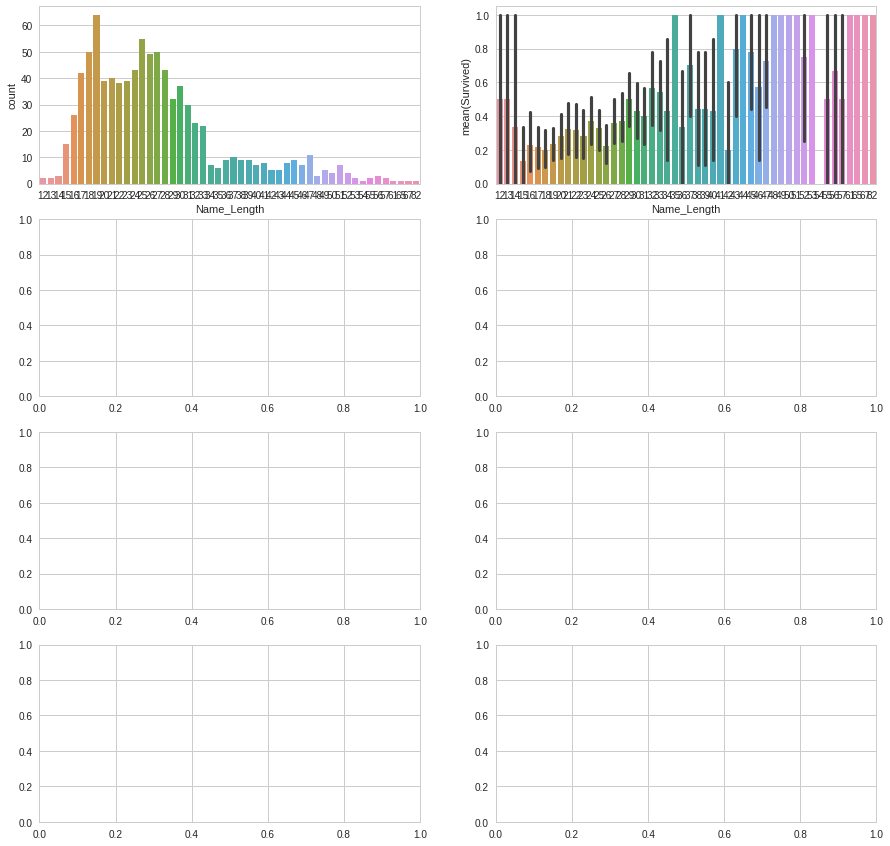

In [1149]:
# Vrack v1 a faire marcher
fig5, ((axis1,axis2),(axis3,axis4),(axis5,axis6),(axis7,axis8)) = plt.subplots(4,2,figsize=(15,15))

# Plot Name_Length
sns.countplot(x='Name_Length', data=df_train, ax=axis1)

# Plot Name_Length by mean of survival
sns.barplot(x='Name_Length', y='Survived', data=df_train, ax=axis2)

# Plot Name_Size by mean of survival
sns.barplot(x='Name_Size', data=df_train, order=["Short","Medium","Long","Very Long"], ax=axis3)

# Plot Name_Size by mean of survival
sns.barplot(x='Name_Size',y='Survived', data=df_train, order=["Short","Medium","Long","Very Long"], ax=axis4)

# Plot Title aggregate
sns.barplot(x='Title_aggr', data=df_train, ax=axis5)

# Display Title aggregate by mean of survival
sns.barplot(x='Title_aggr',y='Survived', data=df_train, ax=axis6)

# Display Title aggregate and Name Size by mean of survival
sns.barplot(x='Title_aggr',y='Survived', hue='Name_Size', data=df_train, ax=axis7)

# Display Title aggregate and Name Size by mean of survival
sns.barplot(x='Name_Size',y='Survived', hue='Title_aggr', data=df_train, ax=axis8)

In [ ]:
# Vrack v2 a faire marcher
fig = plt.figure(figsize=(15, 5))
fig=sns.countplot(x='Name_Length', data=df_train)

fig=sns.barplot(x='Name_Length', y='Survived', data=df_train)

sns.barplot(x='Name_Size',y='Survived', data=df_train, order=["Short","Medium","Long","Very Long"])

# Display aggregate title by survived probability
fig1 = plt.figure(figsize=(15, 5))
fig1=sns.barplot(x='Title_aggr',y='Survived', data=df_train)

# Display aggregate title and Name Size by survived probability
fig2 = plt.figure(figsize=(15, 5))
fig2=sns.barplot(x='Title_aggr',y='Survived', hue='Name_Size', data=df_train)

# Display aggregate title and Name Size by survived probability
fig3 = plt.figure(figsize=(15, 5))
fig3=sns.barplot(x='Name_Size',y='Survived', hue='Title_aggr', data=df_train)

#### Visualization Family

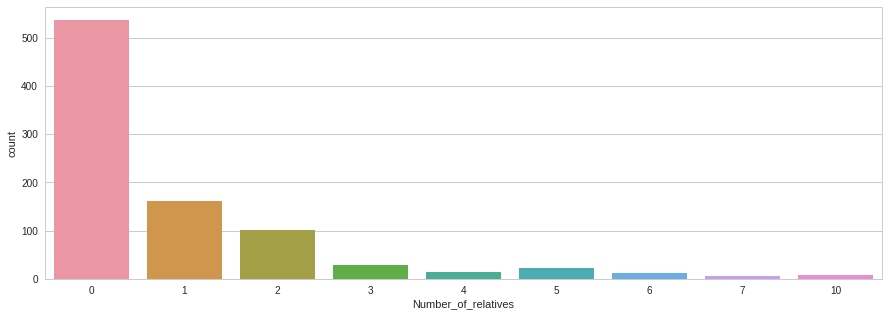

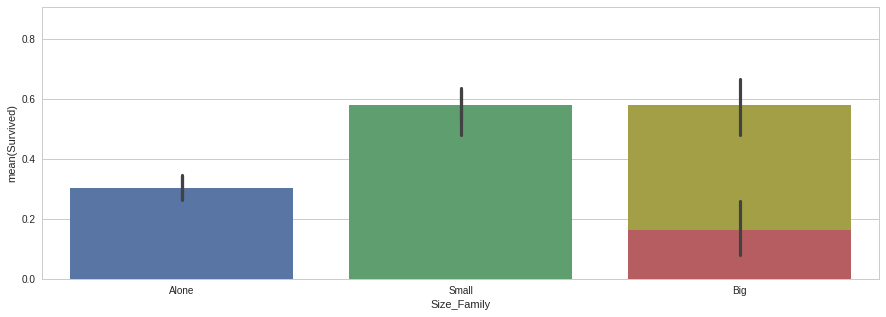

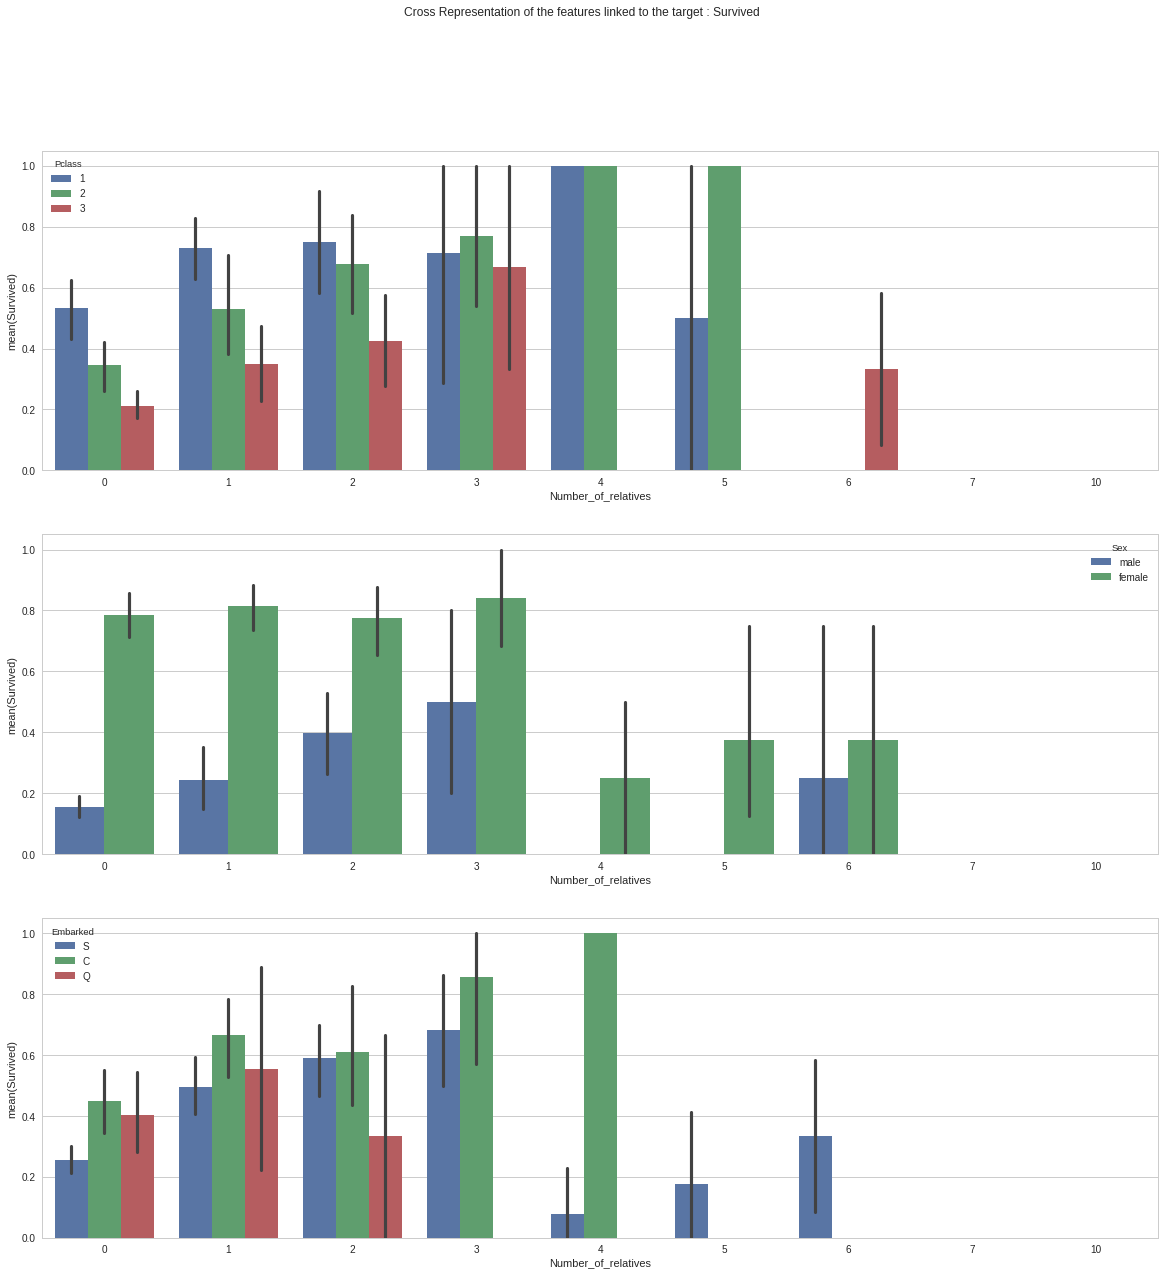

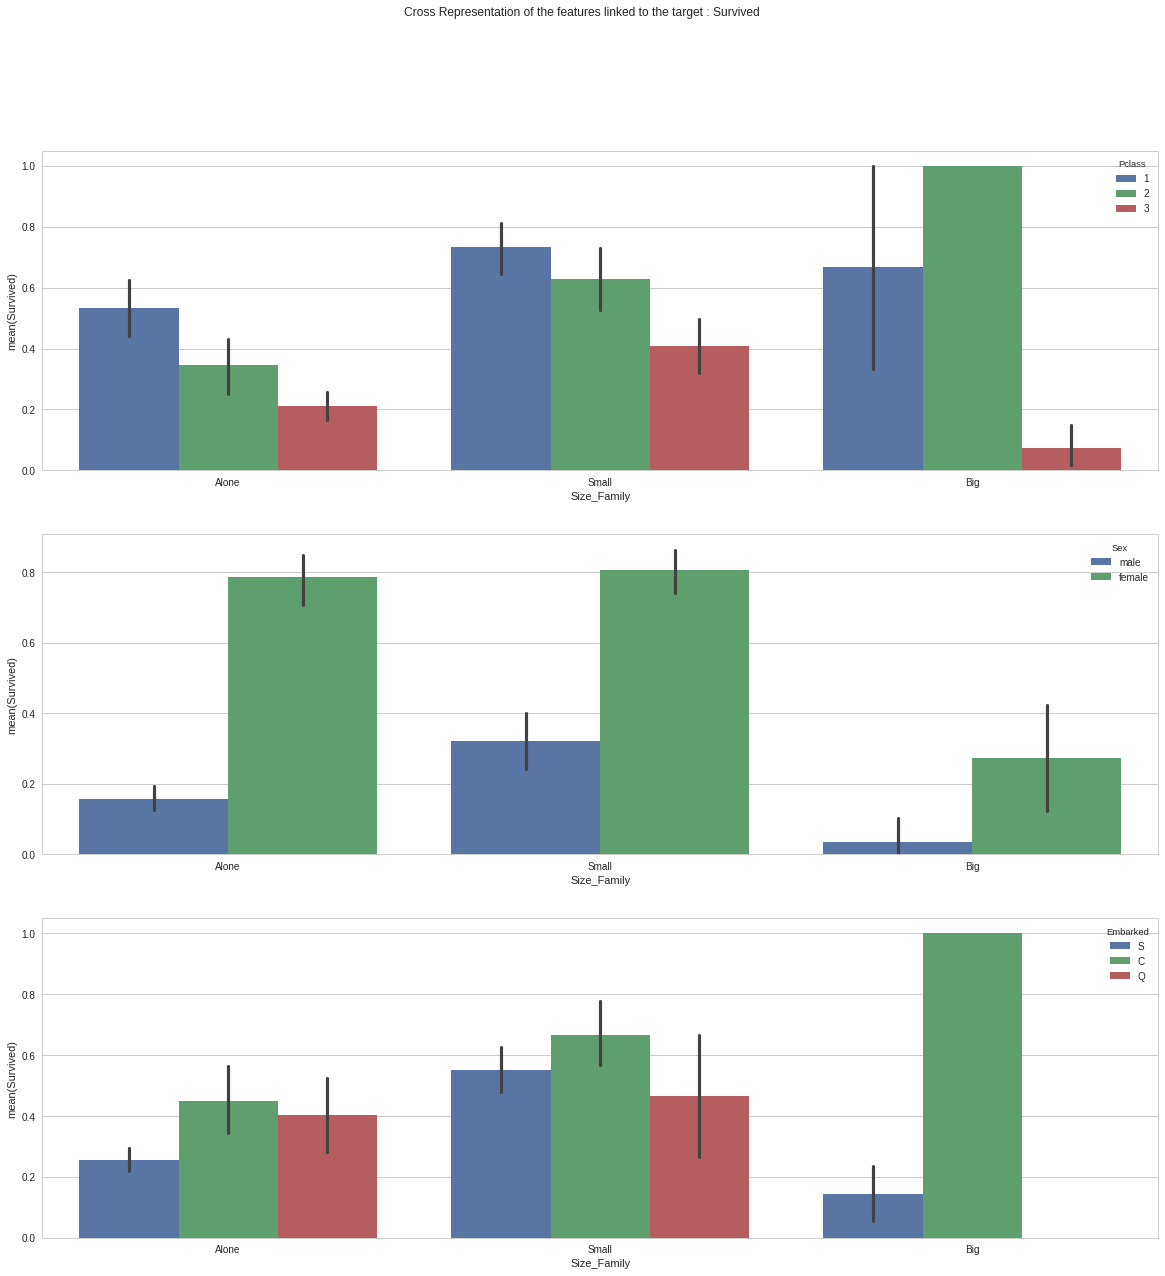

In [999]:
# A afficher correctrement
fig1 = plt.figure(figsize=(15, 5))
fig1 = sns.countplot(x='Number_of_relatives', data=df_train)

fig2 = plt.figure(figsize=(15, 5))
fig2 = sns.barplot(x='Number_of_relatives',y='Survived', data=df_train)

sns.barplot(x='Size_Family',y='Survived', data=df_train, order=['Alone', 'Small', 'Big'])

# Number_of_relatives with Pclass, Sex, Embarked by mean of survival
fig7, ((axis1),(axis2),(axis3)) = plt.subplots(3,1,figsize=(20,20))
sns.barplot(x='Number_of_relatives',y='Survived',hue='Pclass', data=df_train, ax=axis1)
sns.barplot(x='Number_of_relatives',y='Survived',hue='Sex', data=df_train, ax=axis2)
sns.barplot(x='Number_of_relatives',y='Survived',hue='Embarked', data=df_train, ax=axis3)
fig7.suptitle("Cross Representation of the features linked to the target : Survived")

# Size_Family with Pclass, Sex, Embarked by mean of survival
fig8, ((axis1),(axis2),(axis3)) = plt.subplots(3,1,figsize=(20,20))
sns.barplot(x='Size_Family',y='Survived',hue='Pclass', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis1,)
sns.barplot(x='Size_Family',y='Survived',hue='Sex', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis2)
sns.barplot(x='Size_Family',y='Survived',hue='Embarked', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis3)
fig8.suptitle("Cross Representation of the features linked to the target : Survived")

### Convert Categorical features into Numerical Label and One Hot Encoder

In [1150]:
combined.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Name_Length',
       'Name_Size', 'Title', 'Title_aggr', 'Number_of_relatives',
       'Size_Family'],
      dtype='object')

In [1151]:
combined.isnull().sum()

Age                       0
Cabin                  1014
Embarked                  0
Fare                      0
Name                      0
Parch                     0
PassengerId               0
Pclass                    0
Sex                       0
SibSp                     0
Survived                418
Ticket                    0
Name_Length               0
Name_Size                 0
Title                     0
Title_aggr                0
Number_of_relatives       0
Size_Family               0
dtype: int64

In [1152]:
combined.shape

(1309, 18)

In [1153]:
combined[["Embarked","Sex","Title_aggr","Size_Family","Name_Size","Pclass"]].head()

Embarked     Sex Title_aggr Size_Family Name_Size  Pclass
0        S    male         Mr       Small    Medium       3
1        C  female        Mrs       Small      Long       1
2        S  female       Miss       Alone    Medium       3
3        S  female        Mrs       Small      Long       1
4        S    male         Mr       Alone    Medium       3

#### Numerical encoding of Categorical features

In [1154]:
from sklearn.preprocessing import LabelEncoder

# Dataframe with numerical categorical feature
combined_num_cat = pd.DataFrame()

# LabelEncoder
labelEnc = LabelEncoder()

# Columns to apply
cat_vars=["Embarked","Sex","Title_aggr","Size_Family","Name_Size"]

for col in cat_vars:
    labelEnc.fit(np.unique(list(combined[col].values)))
    combined_num_cat[col]=labelEnc.transform(combined[col].astype('str'))
    
labelEnc.fit(np.unique(list(combined["Pclass"].values)))
combined_num_cat["Pclass"]=labelEnc.transform(combined["Pclass"].astype('int'))

In [1155]:
combined_num_cat.head()

Embarked  Sex  Title_aggr  Size_Family  Name_Size  Pclass
0         2    1           2            2          1       2
1         0    0           3            2          0       0
2         2    0           1            0          1       2
3         2    0           3            2          0       0
4         2    1           2            0          1       2

#### One Hot  Encoding of Categorical features

In [1156]:
def one_hot(df_in, cols):
    df_out = pd.DataFrame()
    for each in cols:
        dummies = pd.get_dummies(df_in[each], prefix=each, drop_first=False)
        df_out = pd.concat([df_out, dummies], axis=1)
    return df_out

In [1157]:
# Dataframe with binary categorical feature

# Columns to apply
cat_vars=['Embarked','Sex',"Title_aggr","Size_Family","Name_Size","Pclass"]
combined_One_Hot_Cat = one_hot(combined,cat_vars)

In [1099]:
combined_One_Hot_Cat.head()

Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  \
0           0           0           1           0         1   
1           1           0           0           1         0   
2           0           0           1           1         0   
3           0           0           1           1         0   
4           0           0           1           0         1   

   Title_aggr_Master  Title_aggr_Miss  Title_aggr_Mr  Title_aggr_Mrs  \
0                  0                0              1               0   
1                  0                0              0               1   
2                  0                1              0               0   
3                  0                0              0               1   
4                  0                0              1               0   

   Title_aggr_Officer    ...     Size_Family_Alone  Size_Family_Big  \
0                   0    ...                     0                0   
1                   0    ...                     0                0   
2                   0    ...                     1                0   
3                   0    ...                     0                0   
4                   0    ...                     1                0   

   Size_Family_Small  Name_Size_Short  Name_Size_Medium  Name_Size_Long  \
0                  1                0                 1               0   
1                  1                0                 0               1   
2                  0                0                 1               0   
3                  1                0                 0               1   
4                  0                0                 1               0   

   Name_Size_Very Long  Pclass_1  Pclass_2  Pclass_3  
0                    0         0         0         1  
1                    0         1         0         0  
2                    0         0         0         1  
3                    0         1         0         0  
4                    0         0         0         1  

[5 rows x 21 columns]

### Feature Scalling

In [1158]:
combined[['Fare','Age','Name_Length','Number_of_relatives']].head()

Fare   Age  Name_Length  Number_of_relatives
0   7.2500  22.0           23                    1
1  71.2833  38.0           51                    1
2   7.9250  26.0           22                    0
3  53.1000  35.0           44                    1
4   8.0500  35.0           24                    0

In [1159]:
from sklearn import preprocessing

combined_num_std = pd.DataFrame(combined[['Fare','Age','Name_Length','Number_of_relatives']])

# StandardScaller process
std_scale = preprocessing.StandardScaler()

combined_num_std[['Fare','Age','Name_Length','Number_of_relatives']] = std_scale.fit_transform(combined[['Fare','Age','Name_Length','Number_of_relatives']].astype(float))

combined_num_std[['Fare','Age','Name_Length','Number_of_relatives']].head()

Fare       Age  Name_Length  Number_of_relatives
0 -0.503176 -0.541471    -0.434672             0.073352
1  0.734809  0.648868     2.511806             0.073352
2 -0.490126 -0.243886    -0.539904            -0.558346
3  0.383263  0.425680     1.775186             0.073352
4 -0.487709  0.425680    -0.329441            -0.558346

### Data Preparation

In [1179]:
# Concat
combined_OH_Std = pd.concat([combined_num_std,combined_One_Hot_Cat],axis=1)
combined_Num_Std = pd.concat([combined_num_std,combined_num_cat],axis=1)

In [1183]:
display(combined_OH_Std.shape)
display(combined_Num_Std.shape)

(1309, 25)

(1309, 10)

In [1185]:
# Split
Train_OH_Std, Eval_OH_Std, Target_OH_Std = recover_train_test_target(combined_OH_Std)
Train_Num_Std, Eval_Num_Std, Target_Num_Std = recover_train_test_target(combined_Num_Std)

In [1189]:
display(Train_OH_Std.shape)
display(Test_OH_Std.shape)

(891, 25)

(418, 25)

In [1214]:
# Select Data
data = Train_OH_Std
target = Target_OH_Std
columns_name = list(Train_OH_Std)

# Train & Test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20)

In [1199]:
columns_name

['Fare',
 'Age',
 'Name_Length',
 'Number_of_relatives',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Sex_female',
 'Sex_male',
 'Title_aggr_Master',
 'Title_aggr_Miss',
 'Title_aggr_Mr',
 'Title_aggr_Mrs',
 'Title_aggr_Officer',
 'Title_aggr_Royalty',
 'Size_Family_Alone',
 'Size_Family_Big',
 'Size_Family_Small',
 'Name_Size_Short',
 'Name_Size_Medium',
 'Name_Size_Long',
 'Name_Size_Very Long',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3']

### Features Importance


#### Correlation - Numerical label

In [1240]:
# Concant data and target
Features_with_target = pd.concat([Train_Num_Std,target],axis=1)
# Correlation with target
Corr = pd.DataFrame()
Corr['Corr'] = Features_with_target.corr()["Survived"]
Corr.sort_values('Corr',ascending=False,inplace=True)
display(Corr)
# A réfléchir au sens en regardant la formule de corr pour les catégories le numerical label ordinales et non ordinales

Corr
Survived             1.000000
Name_Length          0.332350
Fare                 0.257307
Size_Family          0.249714
Number_of_relatives  0.016639
Age                 -0.059594
Title_aggr          -0.062916
Embarked            -0.174199
Name_Size           -0.261576
Pclass              -0.338481
Sex                 -0.543351

#### Correlation - One Hot Encoder

In [1241]:
# Concant data and target
Features_with_target = pd.concat([Train_OH_Std,target],axis=1)
# Correlation with target
Corr = pd.DataFrame()
Corr['Corr'] = Features_with_target.corr()["Survived"]
Corr.sort_values('Corr',ascending=False,inplace=True)
display(Corr)

Corr
Survived             1.000000
Sex_female           0.543351
Title_aggr_Mrs       0.344935
Title_aggr_Miss      0.332795
Name_Length          0.332350
Pclass_1             0.285904
Size_Family_Small    0.279855
Name_Size_Long       0.273448
Fare                 0.257307
Embarked_C           0.174718
Pclass_2             0.093349
Title_aggr_Master    0.085221
Name_Size_Very Long  0.085083
Title_aggr_Royalty   0.033391
Number_of_relatives  0.016639
Embarked_Q           0.003650
Name_Size_Medium    -0.000867
Title_aggr_Officer  -0.031316
Age                 -0.059594
Size_Family_Big     -0.125147
Embarked_S          -0.155660
Name_Size_Short     -0.193143
Size_Family_Alone   -0.203367
Pclass_3            -0.322308
Sex_male            -0.543351
Title_aggr_Mr       -0.549199

In [1253]:
X_train.head()

Fare       Age  Name_Length  Number_of_relatives  Embarked_C  \
775 -0.493509 -0.839055     1.249029            -0.558346           0   
378 -0.565768 -0.690263    -0.855598            -0.558346           1   
246 -0.493026 -0.318282     1.038567            -0.558346           0   
307  1.462069 -0.913451     5.773978             0.073352           1   
716  3.755500  0.648868     0.196716            -0.558346           1   

     Embarked_Q  Embarked_S  Sex_female  Sex_male  Title_aggr_Master  \
775           0           1           0         1                  0   
378           0           0           0         1                  0   
246           0           1           1         0                  0   
307           0           0           1         0                  0   
716           0           0           1         0                  0   

       ...     Size_Family_Alone  Size_Family_Big  Size_Family_Small  \
775    ...                     1                0                  0   
378    ...                     1                0                  0   
246    ...                     1                0                  0   
307    ...                     0                0                  1   
716    ...                     1                0                  0   

     Name_Size_Short  Name_Size_Medium  Name_Size_Long  Name_Size_Very Long  \
775                0                 1               0                    0   
378                1                 0               0                    0   
246                0                 1               0                    0   
307                0                 0               0                    1   
716                0                 1               0                    0   

     Pclass_1  Pclass_2  Pclass_3  
775         0         0         1  
378         0         0         1  
246         0         0         1  
307         1         0         0  
716         1         0         0  

[5 rows x 25 columns]

### LDA

In [1256]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [1305]:
# LDA
lda = LinearDiscriminantAnalysis(n_components = 2, solver='svd')
lda.fit(X_train, y_train)

y_train_pred_lda = lda.predict(X_train)
y_test_pred_lda = lda.predict(X_test)

lda_acc = accuracy_score(y_test, y_test_pred_lda)
lda_cr= classification_report(y_test, y_test_pred_lda)
lda_cm = confusion_matrix(y_test, y_test_pred_lda)

print( "LDA Accuracy :", lda_acc)
print(lda_cr)
print("Confusion Matrix :\n",lda_cm)
print('Explained variance ratio :',lda.explained_variance_ratio_)
print('Balance of classes',lda.priors_)

Coef = pd.DataFrame()
Coef['Features'] = list(X_train.columns)
Coef['Coef'] = lda.coef_.transpose()
Coef.sort_values('Coef',ascending=False,inplace=True)
Coef

LDA Accuracy : 0.832402234637
             precision    recall  f1-score   support

          0       0.86      0.88      0.87       115
          1       0.77      0.75      0.76        64

avg / total       0.83      0.83      0.83       179

Confusion Matrix :
 [[101  14]
 [ 16  48]]
Explained variance ratio : [ 1.]
Balance of classes [ 0.61  0.39]


/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Features      Coef
9     Title_aggr_Master  5.095600
7            Sex_female  2.781695
22             Pclass_1  1.278920
21  Name_Size_Very Long  0.932197
15    Size_Family_Alone  0.758195
17    Size_Family_Small  0.346680
20       Name_Size_Long  0.337778
4            Embarked_C  0.321915
11        Title_aggr_Mr  0.307859
3   Number_of_relatives  0.246818
0                  Fare  0.194609
5            Embarked_Q  0.060945
2           Name_Length  0.045550
23             Pclass_2  0.036855
19     Name_Size_Medium  0.004644
18      Name_Size_Short -0.171855
1                   Age -0.250701
6            Embarked_S -0.265323
14   Title_aggr_Royalty -0.488037
13   Title_aggr_Officer -0.533917
10      Title_aggr_Miss -0.897772
12       Title_aggr_Mrs -0.986072
24             Pclass_3 -1.008012
8              Sex_male -2.781695
16      Size_Family_Big -4.163025

#### Features importance


In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cross_validation import KFold
%matplotlib inline
import matplotlib.pyplot as plt
#predictors = ["Pclass", "Sex", "Age", "Fare",
 #             "FsizeD", "Embarked", "NlengthD","Deck","TicketNumber"]
predictors = ["Pclass", "Sex", "Age",
              "Fare","NlengthD", "FsizeD","NameLength","Deck","Embarked"]
# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

indices = np.argsort(scores)[::-1]

sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])

plt.figure()
plt.title("Feature Importances By SelectKBest")
plt.bar(range(np.size(predictors)), scores[indices],
       color="seagreen", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])
plt.show()

In [ ]:
importances=rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
#predictors=titanic.columns
plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])
plt.show()

### Model Selection

In [1254]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier)

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris

from pprint import pprint
import pandas as pd
from IPython.display import display, HTML

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Plot the confusion matrice 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Grid Score into a Pandas Dataframe
def cv_results_to_df(cv_results):
    """
    Convert a sklearn.model_selection.GridSearchCV.cv_results_ attribute to a tidy
    pandas DataFrame where the output is filtered with only mean std and params.
    """
    df=pd.DataFrame.from_dict(cv_results)
    df=df[['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'params']]
    df.sort_values('mean_test_score',ascending=False,inplace=True)
    return df

# Helper function for gridseach
def grid_search_global(clas_reg, dict_pip, dict_param, class_names):

    dict_of_res={}
    dict_of_best={}
    df_results_global=pd.DataFrame()
    
    print ("Starting Gridsearch")
    
    for key in dict_param.keys():
        gs = GridSearchCV(dict_pip[key], dict_param[key], verbose=0, refit=True, n_jobs=-1, cv=5)
        gs = gs.fit(X_train, y_train)
        dict_of_res[key]=gs.grid_scores_
        
        print('\n-------------------------------------------------------------------------------------------------------')
        print ("Gridsearch for %s \n" % dict_param[key])
        print ("Best score :", gs.best_score_)
        print ("Best params :",gs.best_params_)
        dict_of_best[key]=[gs.best_score_,gs.best_params_]
        
        y_train_pred=gs.predict(X_train)
        y_test_pred=gs.predict(X_test)
        
        if (clas_reg=='clas'):
            
            # Classification report
            print('\nClassification report on training set')
            print(classification_report(y_train, y_train_pred))
            print('\nClassification report on testing set')
            print(classification_report(y_test, y_test_pred))
            
            # Compute confusion matrix
            #cnf_matrix = confusion_matrix(y_test, y_test_pred)
            #np.set_printoptions(precision=2)

            # Plot non-normalized confusion matrix
            #plt.figure()
            #plot_confusion_matrix(cnf_matrix, classes=class_names,
            #                      title='Confusion matrix, without normalization')
            
            # Plot normalized confusion matrix
            #plt.figure()
            #plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
            #                      title='Normalized confusion matrix')
            
            #plt.show()
        
        # Resultats deja présent dans : Grid Score #cv_results_ alégé
        #print('\nGrid Score #grid_scores_')
        #pprint(gs.grid_scores_)
        
        # Obtention des résultats avec selection et réarrangement des attributs puis stockage
        df_results=cv_results_to_df(gs.cv_results_)
        df_results['Algo']=key
        df_results=df_results[['Algo','mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'params']]
        df_results_global=df_results_global.append(df_results)
        print("\nGrid Score #cv_results_ alégé")
        display(df_results)
        

        
    # Transformation de dict_of_best en dataframe
    df_best=pd.DataFrame.from_dict(dict_of_best,'index')
    df_best.columns=['Scores','Parameters']
    df_best.sort_values('Scores',ascending=False,inplace=True)  

    print('\n -------------------------------------------------------------------------------------------------------')
    print('\nList of best score and parameters by pipeline')
    display(df_best)
    print('\nSummary')
    display(df_results_global)
    print ("Gridsearch Finished")
    print('\n -------------------------------------------------------------------------------------------------------')    
    return df_best, dict_of_best, df_results_global   

In [1218]:
# Pipeline setup
models = { 
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

# Parameters setup
params = {
    # Il faut mettre 'ExtraTreesClassifier__n_estimators' dans 'ExtraTreesClassifier' car on est sur un pipeline 
    # il est donc possible de préciser des parametres pour chacune des étapes
    'ExtraTreesClassifier': { 'n_estimators': [5, 10, 15, 20, 25, 30, 35] },
    'RandomForestClassifier': { 'n_estimators': [5, 10, 15, 20, 25, 30, 35] },
    'AdaBoostClassifier':  { 'n_estimators': [5, 10, 15, 20, 25, 30, 35] },
    'GradientBoostingClassifier': { 'n_estimators': [5, 10, 15, 20, 25, 30, 35], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

# Lancer la grid search
df_best, dic_best, d_res =grid_search_global('clas',models,params,class_names=columns_name)

Starting Gridsearch

-------------------------------------------------------------------------------------------------------
Gridsearch for {'n_estimators': [5, 10, 15, 20, 25, 30, 35]} 

Best score : 0.790730337079
Best params : {'n_estimators': 30}

Classification report on training set
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       434
          1       1.00      1.00      1.00       278

avg / total       1.00      1.00      1.00       712


Classification report on testing set
             precision    recall  f1-score   support

          0       0.84      0.87      0.85       115
          1       0.75      0.70      0.73        64

avg / total       0.81      0.81      0.81       179


Grid Score #cv_results_ alégé


Exception ignored in: <function WeakValueDictionary.__init__.<locals>.remove at 0x7fb079cc6ae8>
Traceback (most recent call last):
  File "/home/jules/anaconda3/lib/python3.6/weakref.py", line 108, in remove
    def remove(wr, selfref=ref(self)):
KeyboardInterrupt


Algo  mean_test_score  std_test_score  mean_train_score  \
5  ExtraTreesClassifier         0.790730        0.033552          0.998596   
3  ExtraTreesClassifier         0.780899        0.022017          0.998596   
2  ExtraTreesClassifier         0.779494        0.040784          0.998596   
4  ExtraTreesClassifier         0.778090        0.028661          0.998596   
6  ExtraTreesClassifier         0.775281        0.040385          0.998596   
1  ExtraTreesClassifier         0.773876        0.041971          0.998596   
0  ExtraTreesClassifier         0.771067        0.025671          0.998596   

   std_train_score                params  
5         0.000702  {'n_estimators': 30}  
3         0.000702  {'n_estimators': 20}  
2         0.000702  {'n_estimators': 15}  
4         0.000702  {'n_estimators': 25}  
6         0.000702  {'n_estimators': 35}  
1         0.000702  {'n_estimators': 10}  
0         0.000702   {'n_estimators': 5}


-------------------------------------------------------------------------------------------------------
Gridsearch for {'n_estimators': [5, 10, 15, 20, 25, 30, 35]} 

Best score : 0.807584269663
Best params : {'n_estimators': 20}

Classification report on training set
             precision    recall  f1-score   support

          0       0.99      1.00      1.00       434
          1       1.00      0.99      0.99       278

avg / total       0.99      0.99      0.99       712


Classification report on testing set
             precision    recall  f1-score   support

          0       0.86      0.85      0.86       115
          1       0.74      0.75      0.74        64

avg / total       0.82      0.82      0.82       179


Grid Score #cv_results_ alégé


Algo  mean_test_score  std_test_score  mean_train_score  \
3  RandomForestClassifier         0.807584        0.025858          0.990870   
5  RandomForestClassifier         0.806180        0.023706          0.995437   
2  RandomForestClassifier         0.800562        0.027473          0.988768   
4  RandomForestClassifier         0.799157        0.040423          0.996491   
1  RandomForestClassifier         0.794944        0.023820          0.983850   
6  RandomForestClassifier         0.793539        0.041268          0.996842   
0  RandomForestClassifier         0.776685        0.030964          0.970505   

   std_train_score                params  
3         0.002052  {'n_estimators': 20}  
5         0.001398  {'n_estimators': 30}  
2         0.006031  {'n_estimators': 15}  
4         0.002479  {'n_estimators': 25}  
1         0.003746  {'n_estimators': 10}  
6         0.002044  {'n_estimators': 35}  
0         0.003916   {'n_estimators': 5}


-------------------------------------------------------------------------------------------------------
Gridsearch for {'n_estimators': [5, 10, 15, 20, 25, 30, 35]} 

Best score : 0.804775280899
Best params : {'n_estimators': 10}

Classification report on training set
             precision    recall  f1-score   support

          0       0.86      0.85      0.85       434
          1       0.77      0.78      0.78       278

avg / total       0.82      0.82      0.82       712


Classification report on testing set
             precision    recall  f1-score   support

          0       0.86      0.83      0.85       115
          1       0.72      0.75      0.73        64

avg / total       0.81      0.80      0.81       179


Grid Score #cv_results_ alégé


Algo  mean_test_score  std_test_score  mean_train_score  \
1  AdaBoostClassifier         0.804775        0.033436          0.828663   
0  AdaBoostClassifier         0.796348        0.034300          0.814968   
3  AdaBoostClassifier         0.796348        0.034094          0.846921   
5  AdaBoostClassifier         0.796348        0.034227          0.850081   
2  AdaBoostClassifier         0.793539        0.034830          0.840248   
4  AdaBoostClassifier         0.793539        0.038221          0.847976   
6  AdaBoostClassifier         0.792135        0.032389          0.856053   

   std_train_score                params  
1         0.008190  {'n_estimators': 10}  
0         0.013801   {'n_estimators': 5}  
3         0.008794  {'n_estimators': 20}  
5         0.008076  {'n_estimators': 30}  
2         0.009189  {'n_estimators': 15}  
4         0.009322  {'n_estimators': 25}  
6         0.010162  {'n_estimators': 35}


-------------------------------------------------------------------------------------------------------
Gridsearch for {'n_estimators': [5, 10, 15, 20, 25, 30, 35], 'learning_rate': [0.8, 1.0]} 

Best score : 0.817415730337
Best params : {'learning_rate': 0.8, 'n_estimators': 25}

Classification report on training set
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       434
          1       0.96      0.90      0.93       278

avg / total       0.95      0.95      0.94       712


Classification report on testing set
             precision    recall  f1-score   support

          0       0.85      0.85      0.85       115
          1       0.73      0.73      0.73        64

avg / total       0.81      0.81      0.81       179


Grid Score #cv_results_ alégé


Algo  mean_test_score  std_test_score  \
4   GradientBoostingClassifier         0.817416        0.026974   
6   GradientBoostingClassifier         0.813202        0.027727   
5   GradientBoostingClassifier         0.810393        0.033798   
1   GradientBoostingClassifier         0.808989        0.030513   
7   GradientBoostingClassifier         0.804775        0.036806   
0   GradientBoostingClassifier         0.803371        0.038540   
3   GradientBoostingClassifier         0.799157        0.038375   
8   GradientBoostingClassifier         0.799157        0.042589   
11  GradientBoostingClassifier         0.794944        0.027518   
2   GradientBoostingClassifier         0.793539        0.029892   
12  GradientBoostingClassifier         0.779494        0.038232   
13  GradientBoostingClassifier         0.779494        0.033867   
9   GradientBoostingClassifier         0.778090        0.048123   
10  GradientBoostingClassifier         0.778090        0.034174   

    mean_train_score  std_train_score  \
4           0.957519         0.008538   
6           0.975776         0.004616   
5           0.967000         0.003860   
1           0.902396         0.006110   
7           0.878164         0.010165   
0           0.873251         0.010421   
3           0.942418         0.004187   
8           0.913280         0.009258   
11          0.965951         0.009021   
2           0.926274         0.007897   
12          0.974023         0.006770   
13          0.982098         0.006209   
9           0.938911         0.008143   
10          0.954711         0.009358   

                                        params  
4   {'learning_rate': 0.8, 'n_estimators': 25}  
6   {'learning_rate': 0.8, 'n_estimators': 35}  
5   {'learning_rate': 0.8, 'n_estimators': 30}  
1   {'learning_rate': 0.8, 'n_estimators': 10}  
7    {'learning_rate': 1.0, 'n_estimators': 5}  
0    {'learning_rate': 0.8, 'n_estimators': 5}  
3   {'learning_rate': 0.8, 'n_estimators': 20}  
8   {'learning_rate': 1.0, 'n_estimators': 10}  
11  {'learning_rate': 1.0, 'n_estimators': 25}  
2   {'learning_rate': 0.8, 'n_estimators': 15}  
12  {'learning_rate': 1.0, 'n_estimators': 30}  
13  {'learning_rate': 1.0, 'n_estimators': 35}  
9   {'learning_rate': 1.0, 'n_estimators': 15}  
10  {'learning_rate': 1.0, 'n_estimators': 20}


-------------------------------------------------------------------------------------------------------
Gridsearch for [{'kernel': ['linear'], 'C': [1, 10]}, {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]}] 

Best score : 0.828651685393
Best params : {'C': 1, 'kernel': 'linear'}

Classification report on training set
             precision    recall  f1-score   support

          0       0.83      0.90      0.86       434
          1       0.82      0.72      0.77       278

avg / total       0.83      0.83      0.83       712


Classification report on testing set
             precision    recall  f1-score   support

          0       0.85      0.89      0.87       115
          1       0.78      0.72      0.75        64

avg / total       0.82      0.83      0.83       179


Grid Score #cv_results_ alégé


Algo  mean_test_score  std_test_score  mean_train_score  std_train_score  \
0  SVC         0.828652        0.042322          0.830065         0.010297   
1  SVC         0.828652        0.042322          0.829362         0.010189   
4  SVC         0.817416        0.032725          0.822696         0.012716   
5  SVC         0.724719        0.022528          0.734206         0.007898   
2  SVC         0.723315        0.022785          0.733504         0.007885   
3  SVC         0.609551        0.001669          0.609551         0.000417   

                                        params  
0                 {'C': 1, 'kernel': 'linear'}  
1                {'C': 10, 'kernel': 'linear'}  
4   {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}  
5  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}  
2    {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}  
3   {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


 -------------------------------------------------------------------------------------------------------

List of best score and parameters by pipeline


Scores  \
SVC                         0.828652   
GradientBoostingClassifier  0.817416   
RandomForestClassifier      0.807584   
AdaBoostClassifier          0.804775   
ExtraTreesClassifier        0.790730   

                                                            Parameters  
SVC                                       {'C': 1, 'kernel': 'linear'}  
GradientBoostingClassifier  {'learning_rate': 0.8, 'n_estimators': 25}  
RandomForestClassifier                            {'n_estimators': 20}  
AdaBoostClassifier                                {'n_estimators': 10}  
ExtraTreesClassifier                              {'n_estimators': 30}


Summary


Algo  mean_test_score  std_test_score  \
5         ExtraTreesClassifier         0.790730        0.033552   
3         ExtraTreesClassifier         0.780899        0.022017   
2         ExtraTreesClassifier         0.779494        0.040784   
4         ExtraTreesClassifier         0.778090        0.028661   
6         ExtraTreesClassifier         0.775281        0.040385   
1         ExtraTreesClassifier         0.773876        0.041971   
0         ExtraTreesClassifier         0.771067        0.025671   
3       RandomForestClassifier         0.807584        0.025858   
5       RandomForestClassifier         0.806180        0.023706   
2       RandomForestClassifier         0.800562        0.027473   
4       RandomForestClassifier         0.799157        0.040423   
1       RandomForestClassifier         0.794944        0.023820   
6       RandomForestClassifier         0.793539        0.041268   
0       RandomForestClassifier         0.776685        0.030964   
1           AdaBoostClassifier         0.804775        0.033436   
0           AdaBoostClassifier         0.796348        0.034300   
3           AdaBoostClassifier         0.796348        0.034094   
5           AdaBoostClassifier         0.796348        0.034227   
2           AdaBoostClassifier         0.793539        0.034830   
4           AdaBoostClassifier         0.793539        0.038221   
6           AdaBoostClassifier         0.792135        0.032389   
4   GradientBoostingClassifier         0.817416        0.026974   
6   GradientBoostingClassifier         0.813202        0.027727   
5   GradientBoostingClassifier         0.810393        0.033798   
1   GradientBoostingClassifier         0.808989        0.030513   
7   GradientBoostingClassifier         0.804775        0.036806   
0   GradientBoostingClassifier         0.803371        0.038540   
3   GradientBoostingClassifier         0.799157        0.038375   
8   GradientBoostingClassifier         0.799157        0.042589   
11  GradientBoostingClassifier         0.794944        0.027518   
2   GradientBoostingClassifier         0.793539        0.029892   
12  GradientBoostingClassifier         0.779494        0.038232   
13  GradientBoostingClassifier         0.779494        0.033867   
9   GradientBoostingClassifier         0.778090        0.048123   
10  GradientBoostingClassifier         0.778090        0.034174   
0                          SVC         0.828652        0.042322   
1                          SVC         0.828652        0.042322   
4                          SVC         0.817416        0.032725   
5                          SVC         0.724719        0.022528   
2                          SVC         0.723315        0.022785   
3                          SVC         0.609551        0.001669   

    mean_train_score  std_train_score  \
5           0.998596         0.000702   
3           0.998596         0.000702   
2           0.998596         0.000702   
4           0.998596         0.000702   
6           0.998596         0.000702   
1           0.998596         0.000702   
0           0.998596         0.000702   
3           0.990870         0.002052   
5           0.995437         0.001398   
2           0.988768         0.006031   
4           0.996491         0.002479   
1           0.983850         0.003746   
6           0.996842         0.002044   
0           0.970505         0.003916   
1           0.828663         0.008190   
0           0.814968         0.013801   
3           0.846921         0.008794   
5           0.850081         0.008076   
2           0.840248         0.009189   
4           0.847976         0.009322   
6           0.856053         0.010162   
4           0.957519         0.008538   
6           0.975776         0.004616   
5           0.967000         0.003860   
1           0.902396         0.006110   
7           0.878164         0.010165   
0           0.873251         0.010421   
3           0.942418         0.004187   
8           0.913280  

Gridsearch Finished

 -------------------------------------------------------------------------------------------------------


In [1219]:
# Pipeline setup
models = { 
    'GradientBoostingClassifier': GradientBoostingClassifier(),
}

# Parameters setup
params = {
    'GradientBoostingClassifier': { 'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70 , 80 , 90, 100, 120, 150, 170, 200, 250, 300, 400, 500], 
                                   'learning_rate': [0.01,0.03,0.8,0.12,0.16,0.18,0.2,0.25,0.28,0.32,0.37,0.42,0.50,0.60,0.70,0.80,0.9],
                                  'loss' : ['deviance','exponential'],
                                  'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10] 
                                  }
}

# Lancer la grid search
df_best, dic_best, d_res =grid_search_global('clas',models,params,class_names=columns_name)

Starting Gridsearch

-------------------------------------------------------------------------------------------------------
Gridsearch for {'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90], 'learning_rate': [0.8, 1.0]} 

Best score : 0.816011235955
Best params : {'learning_rate': 0.8, 'n_estimators': 40}

Classification report on training set
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       434
          1       0.97      0.94      0.96       278

avg / total       0.97      0.97      0.97       712


Classification report on testing set
             precision    recall  f1-score   support

          0       0.85      0.89      0.87       115
          1       0.78      0.72      0.75        64

avg / total       0.82      0.83      0.83       179


Grid Score #cv_results_ alégé


Algo  mean_test_score  std_test_score  \
4   GradientBoostingClassifier         0.816011        0.034709   
3   GradientBoostingClassifier         0.813202        0.030699   
1   GradientBoostingClassifier         0.808989        0.030513   
10  GradientBoostingClassifier         0.804775        0.036806   
0   GradientBoostingClassifier         0.803371        0.038540   
2   GradientBoostingClassifier         0.803371        0.034253   
8   GradientBoostingClassifier         0.801966        0.033220   
7   GradientBoostingClassifier         0.800562        0.031203   
5   GradientBoostingClassifier         0.799157        0.023219   
9   GradientBoostingClassifier         0.799157        0.035217   
16  GradientBoostingClassifier         0.796348        0.020288   
18  GradientBoostingClassifier         0.796348        0.024662   
6   GradientBoostingClassifier         0.793539        0.026339   
11  GradientBoostingClassifier         0.790730        0.056805   
17  GradientBoostingClassifier         0.789326        0.030171   
19  GradientBoostingClassifier         0.789326        0.022569   
13  GradientBoostingClassifier         0.780899        0.038215   
12  GradientBoostingClassifier         0.779494        0.035237   
14  GradientBoostingClassifier         0.778090        0.038402   
15  GradientBoostingClassifier         0.778090        0.039987   

    mean_train_score  std_train_score  \
4           0.981743         0.004094   
3           0.964539         0.005691   
1           0.902396         0.006110   
10          0.878164         0.010165   
0           0.873251         0.010421   
2           0.943472         0.004171   
8           0.996491         0.002215   
7           0.995088         0.003014   
5           0.989116         0.003020   
9           0.998246         0.001108   
16          0.996842         0.002044   
18          0.998244         0.001112   
6           0.993683         0.002844   
11          0.912929         0.009128   
17          0.997894         0.001314   
19          0.998596         0.000702   
13          0.974023         0.006770   
12          0.954711         0.009358   
14          0.988415         0.004382   
15          0.994034         0.003249   

                                        params  
4   {'learning_rate': 0.8, 'n_estimators': 40}  
3   {'learning_rate': 0.8, 'n_estimators': 30}  
1   {'learning_rate': 0.8, 'n_estimators': 10}  
10   {'learning_rate': 1.0, 'n_estimators': 5}  
0    {'learning_rate': 0.8, 'n_estimators': 5}  
2   {'learning_rate': 0.8, 'n_estimators': 20}  
8   {'learning_rate': 0.8, 'n_estimators': 80}  
7   {'learning_rate': 0.8, 'n_estimators': 70}  
5   {'learning_rate': 0.8, 'n_estimators': 50}  
9   {'learning_rate': 0.8, 'n_estimators': 90}  
16  {'learning_rate': 1.0, 'n_estimators': 60}  
18  {'learning_rate': 1.0, 'n_estimators': 80}  
6   {'learning_rate': 0.8, 'n_estimators': 60}  
11  {'learning_rate': 1.0, 'n_estimators': 10}  
17  {'learning_rate': 1.0, 'n_estimators': 70}  
19  {'learning_rate': 1.0, 'n_estimators': 90}  
13  {'learning_rate': 1.0, 'n_estimators': 30}  
12  {'learning_rate': 1.0, 'n_estimators': 20}  
14  {'learning_rate': 1.0, 'n_estimators': 40}  
15  {'learning_rate': 1.0, 'n_estimators': 50}


 -------------------------------------------------------------------------------------------------------

List of best score and parameters by pipeline


Scores  \
GradientBoostingClassifier  0.816011   

                                                            Parameters  
GradientBoostingClassifier  {'learning_rate': 0.8, 'n_estimators': 40}


Summary


Algo  mean_test_score  std_test_score  \
4   GradientBoostingClassifier         0.816011        0.034709   
3   GradientBoostingClassifier         0.813202        0.030699   
1   GradientBoostingClassifier         0.808989        0.030513   
10  GradientBoostingClassifier         0.804775        0.036806   
0   GradientBoostingClassifier         0.803371        0.038540   
2   GradientBoostingClassifier         0.803371        0.034253   
8   GradientBoostingClassifier         0.801966        0.033220   
7   GradientBoostingClassifier         0.800562        0.031203   
5   GradientBoostingClassifier         0.799157        0.023219   
9   GradientBoostingClassifier         0.799157        0.035217   
16  GradientBoostingClassifier         0.796348        0.020288   
18  GradientBoostingClassifier         0.796348        0.024662   
6   GradientBoostingClassifier         0.793539        0.026339   
11  GradientBoostingClassifier         0.790730        0.056805   
17  GradientBoostingClassifier         0.789326        0.030171   
19  GradientBoostingClassifier         0.789326        0.022569   
13  GradientBoostingClassifier         0.780899        0.038215   
12  GradientBoostingClassifier         0.779494        0.035237   
14  GradientBoostingClassifier         0.778090        0.038402   
15  GradientBoostingClassifier         0.778090        0.039987   

    mean_train_score  std_train_score  \
4           0.981743         0.004094   
3           0.964539         0.005691   
1           0.902396         0.006110   
10          0.878164         0.010165   
0           0.873251         0.010421   
2           0.943472         0.004171   
8           0.996491         0.002215   
7           0.995088         0.003014   
5           0.989116         0.003020   
9           0.998246         0.001108   
16          0.996842         0.002044   
18          0.998244         0.001112   
6           0.993683         0.002844   
11          0.912929         0.009128   
17          0.997894         0.001314   
19          0.998596         0.000702   
13          0.974023         0.006770   
12          0.954711         0.009358   
14          0.988415         0.004382   
15          0.994034         0.003249   

                                        params  
4   {'learning_rate': 0.8, 'n_estimators': 40}  
3   {'learning_rate': 0.8, 'n_estimators': 30}  
1   {'learning_rate': 0.8, 'n_estimators': 10}  
10   {'learning_rate': 1.0, 'n_estimators': 5}  
0    {'learning_rate': 0.8, 'n_estimators': 5}  
2   {'learning_rate': 0.8, 'n_estimators': 20}  
8   {'learning_rate': 0.8, 'n_estimators': 80}  
7   {'learning_rate': 0.8, 'n_estimators': 70}  
5   {'learning_rate': 0.8, 'n_estimators': 50}  
9   {'learning_rate': 0.8, 'n_estimators': 90}  
16  {'learning_rate': 1.0, 'n_estimators': 60}  
18  {'learning_rate': 1.0, 'n_estimators': 80}  
6   {'learning_rate': 0.8, 'n_estimators': 60}  
11  {'learning_rate': 1.0, 'n_estimators': 10}  
17  {'learning_rate': 1.0, 'n_estimators': 70}  
19  {'learning_rate': 1.0, 'n_estimators': 90}  
13  {'learning_rate': 1.0, 'n_estimators': 30}  
12  {'learning_rate': 1.0, 'n_estimators': 20}  
14  {'learning_rate': 1.0, 'n_estimators': 40}  
15  {'learning_rate': 1.0, 'n_estimators': 50}

Gridsearch Finished

 -------------------------------------------------------------------------------------------------------


### Submission

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)

### Fill Age with ML

In [722]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Number_of_relatives', 'Size_Family', 'Name_Length',
       'Name_Size', 'Title', 'Title_aggr', 'Fare_scal'],
      dtype='object')

In [723]:
# Transform age to int --> for babies and age with a x.5 wich are approximation
index_age_not_null=df_train['Age'].notnull()
df_train.loc[index_age_not_null,'Age']=df_train.loc[index_age_not_null,'Age'].apply( lambda x: int(x) )

In [725]:
# Age --> a inferer avec un algo de ML
# Age seems to be promising feature. So it doesnt make sense to simply fill all the null values out with median/mean/mode.

# A ecrire soit meme a la fin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from pprint import pprint

from sklearn.metrics import mean_squared_error,median_absolute_error,mean_absolute_error,explained_variance_score,r2_score
#predicting missing values in age using Random Forest

#Feature set
age_df = df_train[['Age','Embarked','Fare', 'Parch', 'SibSp',
             'Number_of_relatives', 'Title_aggr','Pclass','Size_Family',
             'Name_Length',"Name_Size"]]
# Split sets into train and test
train_age  = age_df.loc[ (df_train.Age.notnull()) ]# known Age values
need_pred_age = age_df.loc[ (df_train.Age.isnull()) ]# null Ages

# All age values are stored in a target array
y = train_age.values[:, 0]

# All the other values are stored in the feature array
X = train_age.values[:, 1::]

# Split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Use the fitted model to predict the missing values
#predictedAges = rtr.predict(test.values[:, 1::])

# Assign those predictions to the full data set
#df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 

In [461]:
# RandomForestRegressor

#Feature set
age_df = df_train[['Age','Embarked','Fare', 'Parch', 'SibSp',
             'Number_of_relatives', 'Title_aggr','Pclass','Size_Family',
             'Name_Length',"Name_Size"]]
# Split sets into train and test
train_age  = age_df.loc[ (df_train.Age.notnull()) ]# known Age values
need_pred_age = age_df.loc[ (df_train.Age.isnull()) ]# null Ages

# All age values are stored in a target array
y = train_age.values[:, 0]

# All the other values are stored in the feature array
X = train_age.values[:, 1::]

# Split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Parameters setup
param_grid1 = [
  {'n_estimators': [10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40],
   'max_depth' : [2,3,4,5,6,7]}]

# Estimator setup
rtr = RandomForestRegressor()

# Gridsearch setup
gs = GridSearchCV(estimator=rtr, 
                  param_grid=param_grid1,
                  scoring='r2',
                  n_jobs=-1, 
                  cv=3, 
                  verbose=1, 
                  refit=True)

# Run gridearch
gs.fit(X_train, y_train)
y_test_pred=gs.predict(X_test)

# Results
print('Best GS Params %s' % gs.best_params_)
print('Best r2 GS Score %.3f' % gs.best_score_)
print('Mean squarred error %.3f' % mean_squared_error(y_test,y_test_pred))
print('Median absolute error %.3f' % median_absolute_error(y_test,y_test_pred))
print('Mean absolute error %.3f' % mean_absolute_error(y_test,y_test_pred))
print('Explained variance score %.3f' % explained_variance_score(y_test,y_test_pred))
print('R2 score %.3f' % r2_score(y_test,y_test_pred))

# Grid Score Report
print('\nGrid Score on training set')
pprint(gs.grid_scores_)

def cv_results_to_df(cv_results):
    """
    Convert a sklearn.model_selection.GridSearchCV.cv_results_ attribute to a tidy
    pandas DataFrame where the output is filtered with only mean std and params.
    """
    df=pd.DataFrame.from_dict(cv_results)
    #df=df[['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'params']]
    df=df[['mean_test_score', 'params']]
    df.sort_values('mean_test_score',ascending=False,inplace=True)
    return df

df_result=cv_results_to_df(gs.cv_results_)
df_result

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:    1.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   13.7s finished


Best GS Params {'criterion': 'mse', 'n_estimators': 100}
Best r2 GS Score 0.310
Mean squarred error 119.150
Median absolute error 6.911
Mean absolute error 8.643
Explained variance score 0.360

Grid Score on training set
[mean: 0.31041, std: 0.07370, params: {'criterion': 'mse', 'n_estimators': 100},
 mean: 0.30780, std: 0.07105, params: {'criterion': 'mse', 'n_estimators': 500},
 mean: 0.30691, std: 0.06887, params: {'criterion': 'mse', 'n_estimators': 1000},
 mean: 0.30669, std: 0.07025, params: {'criterion': 'mse', 'n_estimators': 5000}]


/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [462]:
# GaussianProcessRegressor

from sklearn.gaussian_process import GaussianProcessRegressor

#Feature set
age_df = df_train[['Age','Embarked','Fare', 'Parch', 'SibSp',
             'Number_of_relatives', 'Title_aggr','Pclass','Size_Family',
             'Name_Length',"Name_Size"]]
# Split sets into train and test
train_age  = age_df.loc[ (df_train.Age.notnull()) ]# known Age values
need_pred_age = age_df.loc[ (df_train.Age.isnull()) ]# null Ages

# All age values are stored in a target array
y = train_age.values[:, 0]

# All the other values are stored in the feature array
X = train_age.values[:, 1::]

# Split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Estimator and grid setup
gpr = GaussianProcessRegressor()
param_grid2 = [
  {'n_estimators': [100,500,1000,5000], 
   'criterion': ['mse']}]

# Gridsearch setup
gs = GridSearchCV(estimator=gpr, 
                  param_grid=param_grid2,
                  scoring='r2',
                  n_jobs=-1, 
                  cv=3, 
                  verbose=1, 
                  refit=True)

# Run gridearch
gs.fit(X_train, y_train)
y_test_pred=gs.predict(X_test)

# Results
print('Best GS Params %s' % gs.best_params_)
print('Best r2 GS Score %.3f' % gs.best_score_)
print('Mean squarred error %.3f' % mean_squared_error(y_test,y_test_pred))
print('Median absolute error %.3f' % median_absolute_error(y_test,y_test_pred))
print('Mean absolute error %.3f' % mean_absolute_error(y_test,y_test_pred))
print('Explained variance score %.3f' % explained_variance_score(y_test,y_test_pred))

# Grid Score Report
print('\nGrid Score on training set')
pprint(gs.grid_scores_)

def cv_results_to_df(cv_results):
    """
    Convert a sklearn.model_selection.GridSearchCV.cv_results_ attribute to a tidy
    pandas DataFrame where the output is filtered with only mean std and params.
    """
    df=pd.DataFrame.from_dict(cv_results)
    #df=df[['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'params']]
    df=df[['mean_test_score', 'params']]
    df.sort_values('mean_test_score',ascending=False,inplace=True)
    return df

df_result=cv_results_to_df(gs.cv_results_)
df_result

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.0s finished


Best GS Params {'criterion': 'mse', 'n_estimators': 500}
Best r2 GS Score 0.167
Mean squarred error 144.382
Median absolute error 8.014
Mean absolute error 9.291
Explained variance score 0.224

Grid Score on training set
[mean: 0.16374, std: 0.04075, params: {'criterion': 'mse', 'n_estimators': 100},
 mean: 0.16665, std: 0.03477, params: {'criterion': 'mse', 'n_estimators': 500},
 mean: 0.16417, std: 0.03774, params: {'criterion': 'mse', 'n_estimators': 1000},
 mean: 0.16609, std: 0.03506, params: {'criterion': 'mse', 'n_estimators': 5000}]


/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [ ]:
# GradientBoostingRegressor

#Feature set
age_df = df_train[['Age','Embarked','Fare', 'Parch', 'SibSp',
             'Number_of_relatives', 'Title_aggr','Pclass','Size_Family',
             'Name_Length',"Name_Size"]]
# Split sets into train and test
train_age  = age_df.loc[ (df_train.Age.notnull()) ]# known Age values
need_pred_age = age_df.loc[ (df_train.Age.isnull()) ]# null Ages

# All age values are stored in a target array
y = train_age.values[:, 0]

# All the other values are stored in the feature array
X = train_age.values[:, 1::]

# Split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

gbr = GradientBoostingRegressor()
param_grid3 = [
  {'n_estimators': [5,7,10,12,16,20,30,100], 
   'criterion': ['friedman_mse'],
   'learning_rate': np.linspace(0.2,0.4,10),
   'loss': ['ls','lad']
  }]

# Gridsearch setup
gs = GridSearchCV(estimator=gbr, 
                  param_grid=param_grid3,
                  scoring='r2',
                  n_jobs=-1, 
                  cv=3, 
                  verbose=1, 
                  refit=True)

# Run gridearch
gs.fit(X_train, y_train)
y_test_pred=gs.predict(X_test)

# Results
print('Best GS Params %s' % gs.best_params_)
print('Best r2 GS Score %.3f' % gs.best_score_)
print('Mean squarred error %.3f' % mean_squared_error(y_test,y_test_pred))
print('Median absolute error %.3f' % median_absolute_error(y_test,y_test_pred))
print('Mean absolute error %.3f' % mean_absolute_error(y_test,y_test_pred))
print('Explained variance score %.3f' % explained_variance_score(y_test,y_test_pred))

# Grid Score Report
print('\nGrid Score on training set')
pprint(gs.grid_scores_)

def cv_results_to_df(cv_results):
    """
    Convert a sklearn.model_selection.GridSearchCV.cv_results_ attribute to a tidy
    pandas DataFrame where the output is filtered with only mean std and params.
    """
    df=pd.DataFrame.from_dict(cv_results)
    #df=df[['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'params']]
    df=df[['mean_test_score', 'params']]
    df.sort_values('mean_test_score',ascending=False,inplace=True)
    return df

df_result=cv_results_to_df(gs.cv_results_)
df_result

In [467]:
# SVR
from sklearn.svm import SVR


#Feature set
age_df = df_train[['Age','Embarked','Fare', 'Parch', 'SibSp',
             'Number_of_relatives', 'Title_aggr','Pclass','Size_Family',
             'Name_Length',"Name_Size"]]
# Split sets into train and test
train_age  = age_df.loc[ (df_train.Age.notnull()) ]# known Age values
need_pred_age = age_df.loc[ (df_train.Age.isnull()) ]# null Ages

# All age values are stored in a target array
y = train_age.values[:, 0]

# All the other values are stored in the feature array
X = train_age.values[:, 1::]

# Split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Estimator
svr = SVR()
#param_grid4 = [
#  {'C': [0.1,0.3,1,3,10,30,100,300], 
#   'kernel': ['rbf','poly','sigmoid','linear'],
#   'epsilon': [0.05,0.1,0.25,0.5,0.75,0.90]
#  }]

param_grid4 = [
  {'C': [0.1,0.3,1,3,10], 
   'kernel': ['rbf'],
   'epsilon': [0.05,0.1,0.25,0.5]
  }]

# Gridsearch setup
gs = GridSearchCV(estimator=svr, 
                  param_grid=param_grid4,
                  scoring='r2',
                  n_jobs=-1, 
                  cv=3, 
                  verbose=2, 
                  refit=True)

# Run gridearch
gs.fit(X_train, y_train)
y_test_pred=gs.predict(X_test)

# Results
print('Best GS Params %s' % gs.best_params_)
print('Best r2 GS Score %.3f' % gs.best_score_)
print('Mean squarred error %.3f' % mean_squared_error(y_test,y_test_pred))
print('Median absolute error %.3f' % median_absolute_error(y_test,y_test_pred))
print('Mean absolute error %.3f' % mean_absolute_error(y_test,y_test_pred))
print('Explained variance score %.3f' % explained_variance_score(y_test,y_test_pred))

# Grid Score Report
print('\nGrid Score on training set')
pprint(gs.grid_scores_)

def cv_results_to_df(cv_results):
    """
    Convert a sklearn.model_selection.GridSearchCV.cv_results_ attribute to a tidy
    pandas DataFrame where the output is filtered with only mean std and params.
    """
    df=pd.DataFrame.from_dict(cv_results)
    #df=df[['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'params']]
    df=df[['mean_test_score', 'params']]
    df.sort_values('mean_test_score',ascending=False,inplace=True)
    return df

df_result=cv_results_to_df(gs.cv_results_)
df_result

# Score 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, epsilon=0.05, kernel=rbf .................................
[CV] C=0.1, epsilon=0.05, kernel=rbf .................................
[CV] C=0.1, epsilon=0.05, kernel=rbf .................................
[CV] C=0.1, epsilon=0.1, kernel=rbf ..................................
[CV] .................. C=0.1, epsilon=0.05, kernel=rbf, total=   0.1s
[CV] .................. C=0.1, epsilon=0.05, kernel=rbf, total=   0.1s
[CV] .................. C=0.1, epsilon=0.05, kernel=rbf, total=   0.1s
[CV] ................... C=0.1, epsilon=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, epsilon=0.25, kernel=rbf .................................
[CV] C=0.1, epsilon=0.1, kernel=rbf ..................................
[CV] C=0.1, epsilon=0.1, kernel=rbf ..................................
[CV] C=0.1, epsilon=0.25, kernel=rbf .................................
[CV] .................. C=0.1, epsilon=0.25, kernel=rbf, total=   0.0s
[CV] ...........

KeyboardInterrupt: 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.datasets import load_iris

from pprint import pprint

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Classifieur setup
cls = SVC(C=10.0, 
          kernel='rbf', 
          gamma=0.1, 
          decision_function_shape='ovr')

# Pipeline setup
kernel_svm = Pipeline([('std', StandardScaler()), 
                       ('svc', cls)])

# Parameters setup
param_grid = [
  {'svc__C': [1, 10, 100, 1000], 
   'svc__gamma': [0.001, 0.0001], 
   'svc__kernel': ['rbf']},
 ]

# Gridsearch setup
gs = GridSearchCV(estimator=kernel_svm, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  n_jobs=-1, 
                  cv=5, 
                  verbose=1, 
                  refit=True,
                  pre_dispatch='2*n_jobs')

# Run gridearch
gs.fit(X_train, y_train)

# Prediction
y_train_pred = gs.predict(X_train)
y_test_pred = gs.predict(X_test)

# Results
print('Best GS Params %s' % gs.best_params_)
print('Best GS Score %.3f' % gs.best_score_)

# Prediction on the training set
train_acc = (y_train == y_train_pred).sum()/len(y_train)
print('\nTrain Accuracy: %.3f' % (train_acc))

# Evaluation on the test set
test_acc = (y_test == y_test_pred).sum()/len(y_test)
print('\nTest Accuracy: %.3f' % (test_acc))

# Classification Reports
print('\nClassification report on training set')
print(classification_report(y_train, y_train_pred))
print('\nClassification report on testing set')
print(classification_report(y_test, y_test_pred))

# Grid Score Report
print('\nGrid Score on training set')
pprint(gs.grid_scores_)

In [ ]:
# Age --> a inferer avec un algo de ML
# Age seems to be promising feature. So it doesnt make sense to simply fill all the null values out with median/mean/mode.

# A ecrire soit meme a la fin

from sklearn.ensemble import RandomForestRegressor
#predicting missing values in age using Random Forest
def fill_missing_age(df):
    
    #Feature set
    age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp',
                 'TicketNumber', 'Title','Pclass','FamilySize',
                 'FsizeD','NameLength',"NlengthD",'Deck']]
    # Split sets into train and test
    train  = age_df.loc[ (df.Age.notnull()) ]# known Age values
    test = age_df.loc[ (df.Age.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

/home/jules/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


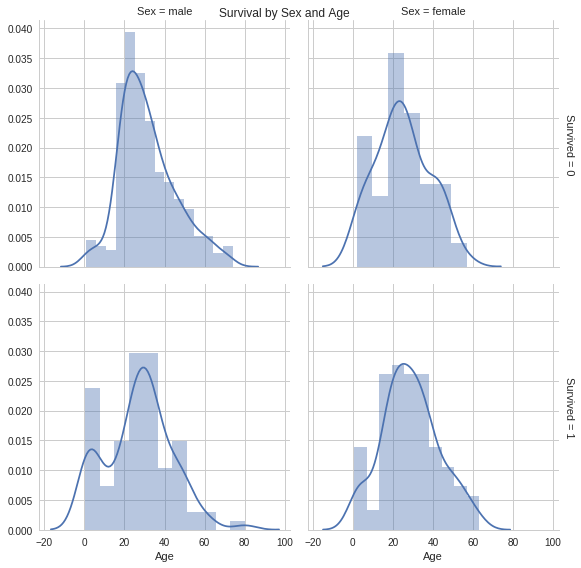

In [791]:
# Study of Age & Sex
g = sns.FacetGrid(df_train,col="Sex", row="Survived",margin_titles=True,size=4)
g.map(sns.distplot, "Age")
g.fig.suptitle('Survival by Sex and Age')

### Features engineering 2

#### Name 2

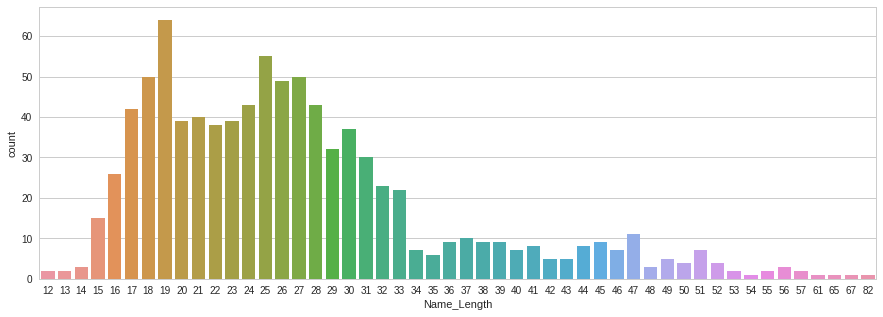

In [693]:
#Create feature for the length of name 
df_train["Name_Length"] = df_train["Name"].apply(lambda x: len(x))
df_test["Name_Length"] = df_test["Name"].apply(lambda x: len(x))

fig = plt.figure(figsize=(15, 5))
fig=sns.countplot(x='Name_Length', data=df_train)

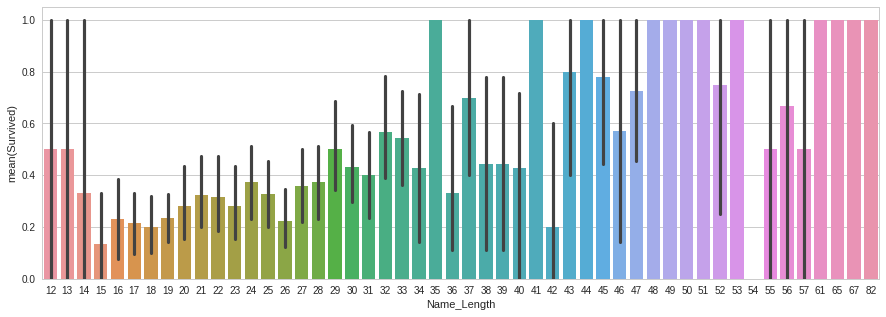

In [694]:
# Plot Name_Length by mean of survival
fig = plt.figure(figsize=(15, 5))
fig=sns.barplot(x='Name_Length', y='Survived', data=df_train)

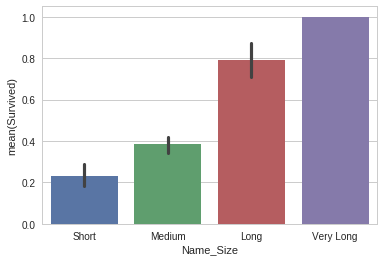

In [695]:
# Create a categorical feature Name_Size
df_train['Name_Size']=pd.cut(df_train['Name_Length']
                            ,bins=[0,20,40,60,90]
                            ,labels=["Short","Medium","Long","Very Long"])

df_test['Name_Size']=pd.cut(df_train['Name_Length']
                            ,bins=[0,20,40,60,90]
                            ,labels=["Short","Medium","Long","Very Long"])

sns.barplot(x='Name_Size',y='Survived', data=df_train, order=["Short","Medium","Long","Very Long"])



Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
Don               1
the Countess      1
Lady              1
Sir               1
Mme               1
Ms                1
Capt              1
dtype: int64

Title_aggr
Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
dtype: int64

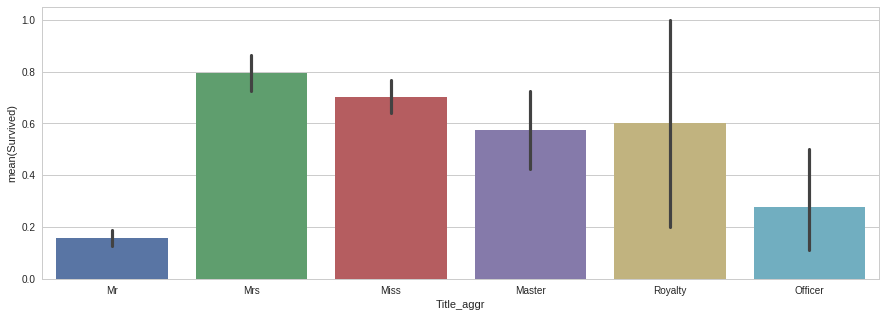

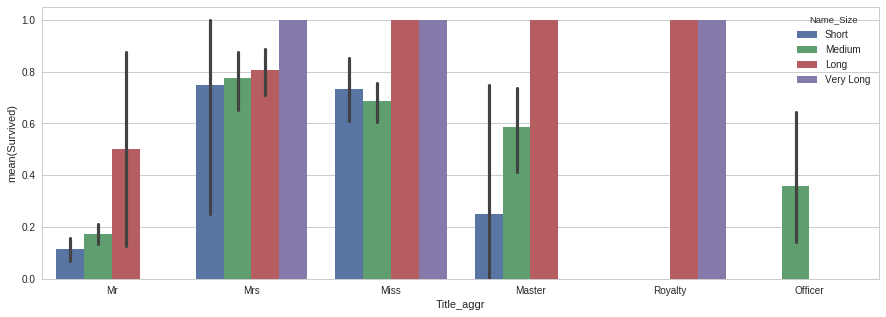

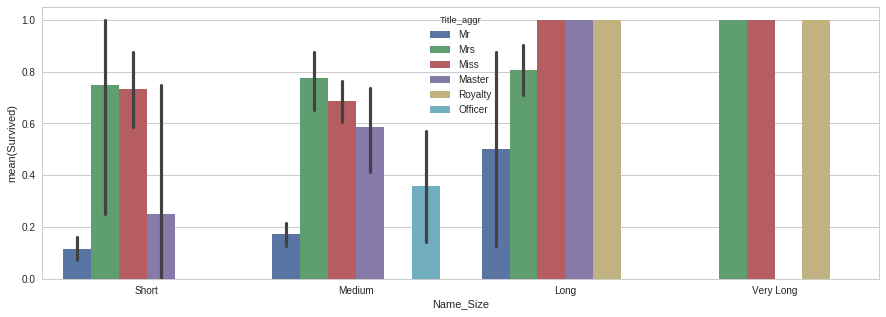

In [696]:
# Extract the title from each name
df_train['Title'] = df_train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
df_test['Title'] = df_train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

# Display the title
Sort_Title=df_train.groupby('Title').size()
Sort_Title.sort_values(ascending=False,inplace=True)
display(Sort_Title)

# Map for aggregated titles
Title_Dictionary = {
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Master" :    "Master",
                    "Lady" :      "Royalty",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dona":       "Royalty",
                    "the Countess":"Royalty"
                    }
    
# Mapping
df_train['Title_aggr'] = df_train.Title.map(Title_Dictionary)
df_test['Title_aggr'] = df_test.Title.map(Title_Dictionary)

# Display aggregate title
Sort_Title_agg=df_train.groupby('Title_aggr').size()
Sort_Title_agg.sort_values(ascending=False,inplace=True)
display(Sort_Title_agg)

# Display aggregate title by survived probability
fig1 = plt.figure(figsize=(15, 5))
fig1=sns.barplot(x='Title_aggr',y='Survived', data=df_train)

# Display aggregate title and Name Size by survived probability
fig2 = plt.figure(figsize=(15, 5))
fig2=sns.barplot(x='Title_aggr',y='Survived', hue='Name_Size', data=df_train)

# Display aggregate title and Name Size by survived probability
fig3 = plt.figure(figsize=(15, 5))
fig3=sns.barplot(x='Name_Size',y='Survived', hue='Title_aggr', data=df_train)

#### Family

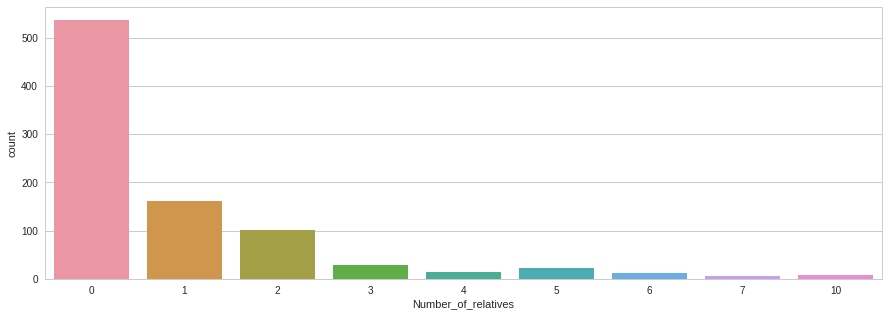

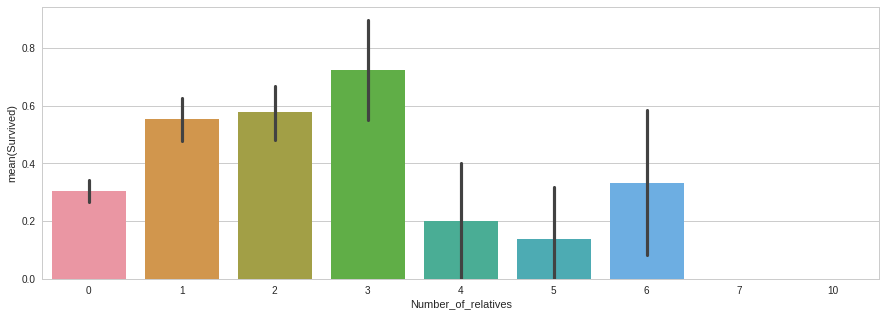

In [835]:
# Creation of a feature Number_of_relatives = SibSp + Parch and quick view
df_train['Number_of_relatives']=df_train['SibSp']+df_train['Parch']
df_test['Number_of_relatives']=df_test['SibSp']+df_train['Parch']

fig1 = plt.figure(figsize=(15, 5))
fig1 = sns.countplot(x='Number_of_relatives', data=df_train)

fig2 = plt.figure(figsize=(15, 5))
fig2 = sns.barplot(x='Number_of_relatives',y='Survived', data=df_train)

We can create 3 categories : 
    - Alone = 0
    - Small = [1,2,3]
    - Big = > 3

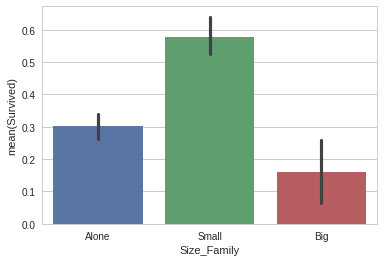

In [678]:
# Creation of a categorical feature Size_Family
df_train.loc[df_train['Number_of_relatives'] == 0, 'Size_Family'] = 'Alone'
df_train.loc[ (df_train['Number_of_relatives'] > 0) 
            & (df_train['Number_of_relatives'] < 4), 'Size_Family'] = 'Small'
df_train.loc[df_train['Number_of_relatives'] > 3, 'Size_Family'] = 'Big'

df_test.loc[df_test['Number_of_relatives'] == 0, 'Size_Family'] = 'Alone'
df_test.loc[ (df_test['Number_of_relatives'] > 0) 
            & (df_test['Number_of_relatives'] < 4), 'Size_Family'] = 'Small'
df_test.loc[df_test['Number_of_relatives'] > 3, 'Size_Family'] = 'Big'

sns.barplot(x='Size_Family',y='Survived', data=df_train, order=['Alone', 'Small', 'Big'])

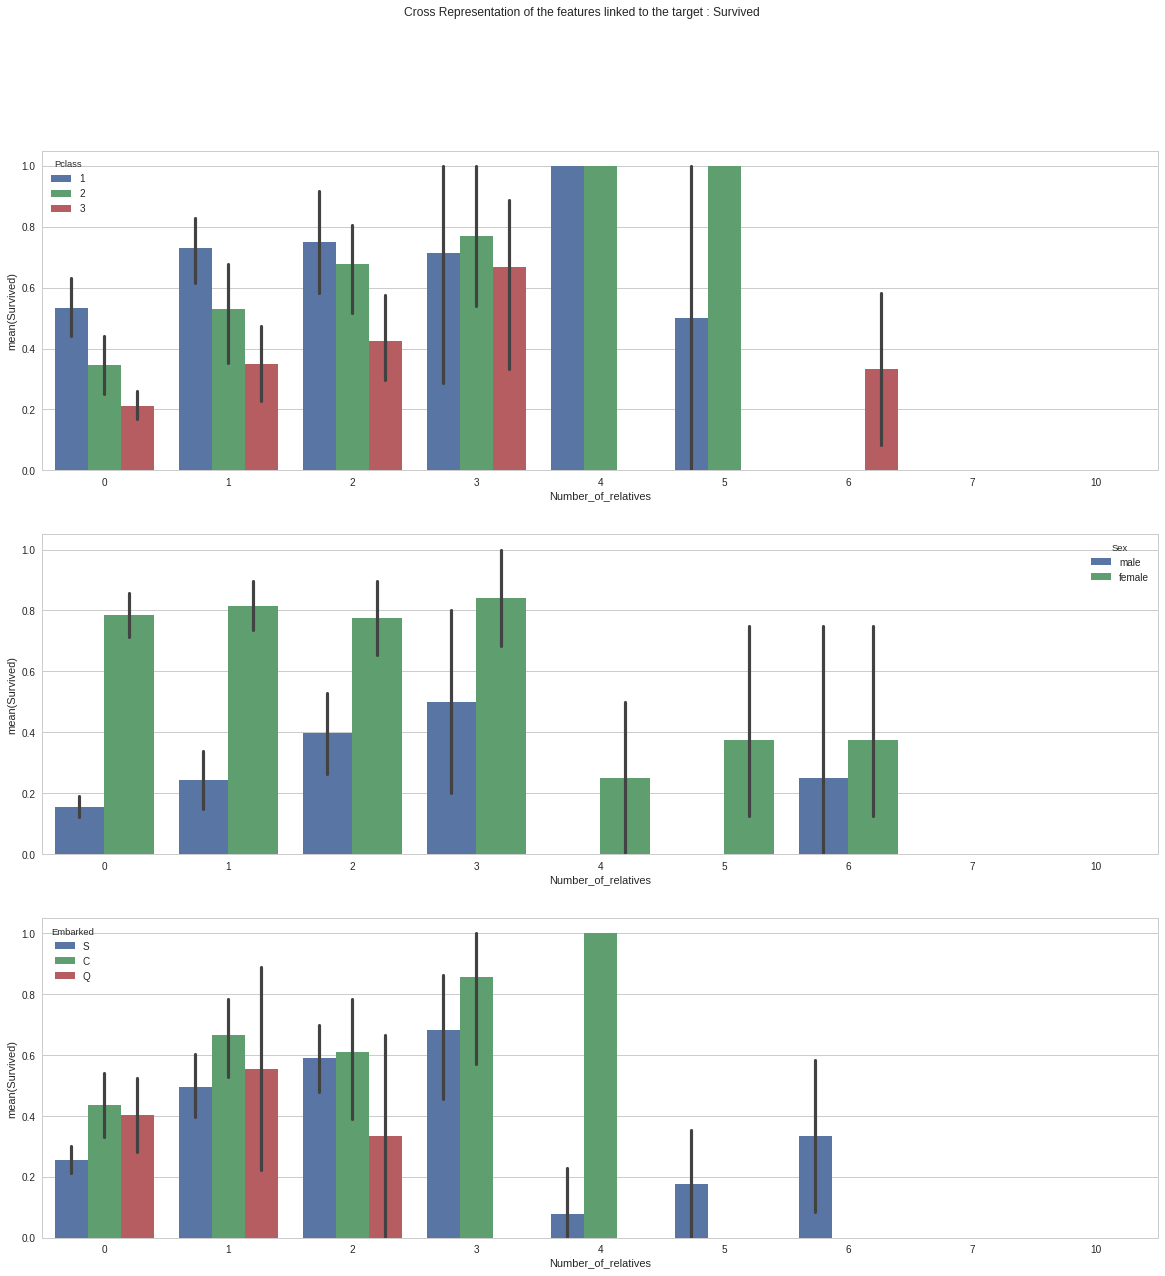

In [679]:
# Number_of_relatives with Pclass, Sex, Embarked by mean of survival
fig7, ((axis1),(axis2),(axis3)) = plt.subplots(3,1,figsize=(20,20))
sns.barplot(x='Number_of_relatives',y='Survived',hue='Pclass', data=df_train, ax=axis1)
sns.barplot(x='Number_of_relatives',y='Survived',hue='Sex', data=df_train, ax=axis2)
sns.barplot(x='Number_of_relatives',y='Survived',hue='Embarked', data=df_train, ax=axis3)
fig7.suptitle("Cross Representation of the features linked to the target : Survived")

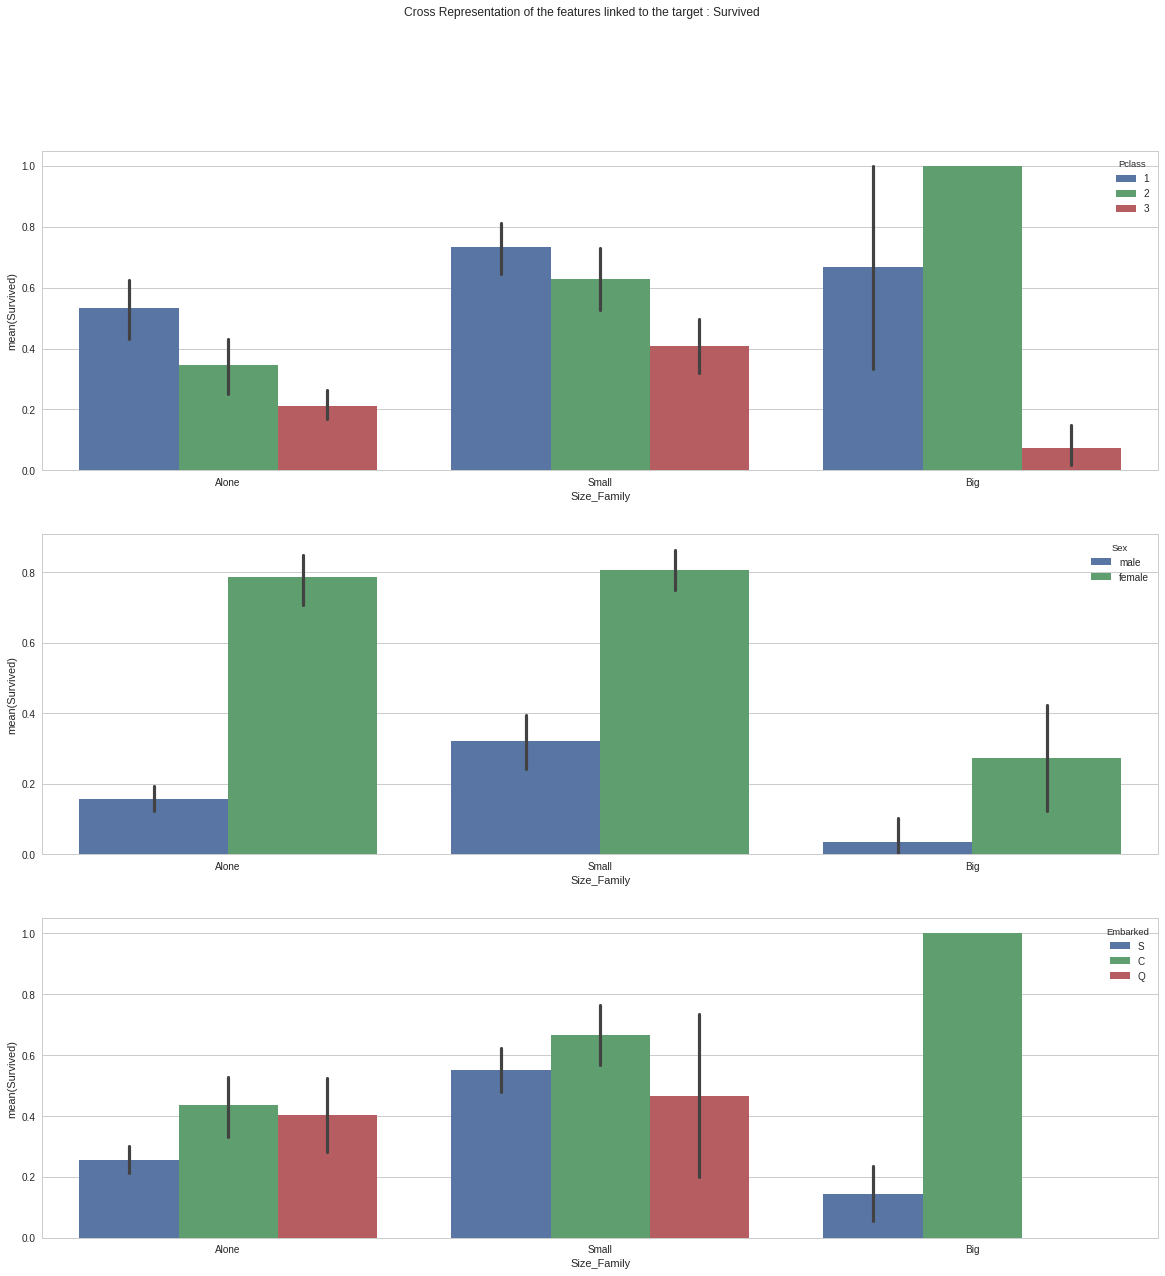

In [680]:
# Size_Family with Pclass, Sex, Embarked by mean of survival
fig7, ((axis1),(axis2),(axis3)) = plt.subplots(3,1,figsize=(20,20))
sns.barplot(x='Size_Family',y='Survived',hue='Pclass', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis1,)
sns.barplot(x='Size_Family',y='Survived',hue='Sex', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis2)
sns.barplot(x='Size_Family',y='Survived',hue='Embarked', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis3)
fig7.suptitle("Cross Representation of the features linked to the target : Survived")

### Trying to use OneHotEncoder

In [1044]:
# Trying to use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

# Dataframe with binary categorical feature
df_train_Binary_Cat = pd.DataFrame()
df_test_Binary_Cat = pd.DataFrame()

# Columns to apply
cat_vars=['Embarked','Sex',"Title_aggr","Size_Family","Name_Size"]

for col in cat_vars:
    enc.fit(df_train_Numerical_Cat[col])
    
    df_train_enc = enc.transform(df_train_Numerical_Cat[col].astype(int) )
    print(type(df_train_enc))
    df_train_Binary_Cat[col] = df_train_enc
    #pd.concat([df_train_Binary_Cat,df_train_enc], axis=1)
    
    df_test_enc  = enc.transform(df_test_Numerical_Cat[col].astype(int) )
    df_test_Binary_Cat = pd.concat([df_test_Binary_Cat,df_test_enc], axis=1)

<class 'scipy.sparse.csr.csr_matrix'>


/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series